In [177]:
import os
print('Diretório inicial: ', os.getcwd())
novo_dir = 'D:/06_Pos_PUC_MINAS/00. TCC/00_xlsx'
os.chdir(novo_dir)
print('Novo diretório: ', os.getcwd())

Diretório inicial:  D:\06_Pos_PUC_MINAS\00. TCC\00_xlsx
Novo diretório:  D:\06_Pos_PUC_MINAS\00. TCC\00_xlsx


# **3. Processamento/Tratamento de dados**

### **Primeiro dataset: dados dos participantes do programa PGDC**

In [178]:
import pandas as pd

In [179]:
# Leitura do arquivo dos beneficiários acompanhados pelo PGDC
df_participantes_pgdc = pd.read_excel('participantes_pgdc_anonimizada.xlsx', sheet_name='Sheet1')

In [180]:
# Exibir a quantidade de registros do dataframe
qt_registro = len(df_participantes_pgdc)
print('Quantidade de registros do DataFrame:',qt_registro)

Quantidade de registros do DataFrame: 50367


In [181]:
# Visualização das colunas e tipos
print('Colunas e tipos de dados:\n')
df_participantes_pgdc.dtypes

Colunas e tipos de dados:



NR_SEQUENCIA                            int64
DT_MES_COMPETENCIA             datetime64[ns]
NR_SEQ_EQUIPE                           int64
NM_EQUIPE                              object
SK_PF_RESPONSAVEL_EQUIPE                int64
IE_SITUACAO_EQUIPE                     object
CD_ESTABELECIMENTO                      int64
DS_OBJETIVO                           float64
NR_SEQ_FUNCAO                           int64
CD_PESSOA_FISICA                       object
DT_INICIO_ACOMP                        object
DT_FIM_ACOMP                   datetime64[ns]
DT_COMPETENCIA_INICIO_ACOMP            object
DT_COMPETENCIA_FIM_ACOMP       datetime64[ns]
IE_FORMA_ATENDIMENTO                   object
DS_FORMA_ATEND                         object
dtype: object

In [182]:
# Remoção das colunas não necessárias
colunas_remover = ['DT_MES_COMPETENCIA','NR_SEQ_EQUIPE','NM_EQUIPE','SK_PF_RESPONSAVEL_EQUIPE',
                   'IE_SITUACAO_EQUIPE','CD_ESTABELECIMENTO','DS_OBJETIVO','NR_SEQ_FUNCAO',
                   'DT_INICIO_ACOMP','DT_FIM_ACOMP','IE_FORMA_ATENDIMENTO','DS_FORMA_ATEND']
df_participantes_pgdc = df_participantes_pgdc.drop(colunas_remover, axis=1)

# Visualização dos tipos das colunas do DataFrame df_participantes_pgdc
print('Tipos das colunas do df_participantes_pgdc:\n')
print(df_participantes_pgdc.dtypes)
print('\n')

Tipos das colunas do df_participantes_pgdc:

NR_SEQUENCIA                            int64
CD_PESSOA_FISICA                       object
DT_COMPETENCIA_INICIO_ACOMP            object
DT_COMPETENCIA_FIM_ACOMP       datetime64[ns]
dtype: object




In [183]:
# Análise dos dados armazenados na coluna DT_COMPETENCIA_INICIO_ACOMP
vl_dt_inicio_acomp = df_participantes_pgdc['DT_COMPETENCIA_INICIO_ACOMP'].unique()
print(vl_dt_inicio_acomp)

[datetime.datetime(2022, 4, 1, 0, 0) datetime.datetime(2022, 5, 1, 0, 0)
 datetime.datetime(2022, 7, 1, 0, 0) datetime.datetime(2021, 9, 1, 0, 0)
 datetime.datetime(2021, 8, 1, 0, 0) datetime.datetime(2020, 3, 1, 0, 0)
 datetime.datetime(2022, 11, 1, 0, 0) datetime.datetime(2021, 10, 1, 0, 0)
 datetime.datetime(2022, 1, 1, 0, 0) datetime.datetime(2022, 6, 1, 0, 0)
 datetime.datetime(2021, 7, 1, 0, 0) datetime.datetime(2022, 3, 1, 0, 0)
 datetime.datetime(2022, 9, 1, 0, 0) datetime.datetime(2022, 10, 1, 0, 0)
 datetime.datetime(2021, 11, 1, 0, 0) datetime.datetime(2022, 2, 1, 0, 0)
 datetime.datetime(2022, 8, 1, 0, 0) datetime.datetime(2021, 5, 1, 0, 0)
 '01/12/0222' datetime.datetime(2021, 6, 1, 0, 0)
 datetime.datetime(2022, 12, 1, 0, 0) datetime.datetime(2018, 7, 1, 0, 0)
 datetime.datetime(2019, 2, 1, 0, 0) datetime.datetime(2019, 4, 1, 0, 0)
 datetime.datetime(2019, 5, 1, 0, 0) datetime.datetime(2019, 7, 1, 0, 0)
 datetime.datetime(2019, 8, 1, 0, 0) datetime.datetime(2018, 6, 1, 0,

In [184]:
# Filtrar os registros do DataFrame pela coluna DT_COMPETENCIA_INICIO_ACOMP == '01/12/0222'
qt_registros = df_participantes_pgdc[df_participantes_pgdc['DT_COMPETENCIA_INICIO_ACOMP'] == '01/12/0222']
print("Quantidade de registros com DT_COMPETENCIA_INICIO_ACOMP igual a '01/12/0222':", qt_registros.shape[0])

Quantidade de registros com DT_COMPETENCIA_INICIO_ACOMP igual a '01/12/0222': 37


In [185]:
#Excluir os registros com preenchimento errado do atributo DT_COMPETENCIA_INICIO_ACOMP
indices_remover = df_participantes_pgdc[df_participantes_pgdc['DT_COMPETENCIA_INICIO_ACOMP'] == '01/12/0222'].index
df_participantes_pgdc.drop(indices_remover, inplace=True)

#Exibir a quantidade de registros do DataFrame df_beneficiarios
qt_registros = len(df_participantes_pgdc)
print('Quantidade de registros em df_beneficiarios: ', qt_registros)

Quantidade de registros em df_beneficiarios:  50330


In [186]:
#Menor data do atributo DT_COMPETENCIA_INICIO_ACOMP
min_data_acompanhamento = df_participantes_pgdc['DT_COMPETENCIA_INICIO_ACOMP'].min()
print('Menor data de início de acompanhamento pelo programa: ', min_data_acompanhamento)

# Alterar o tipo da coluna DT_COMPETENCIA_INICIO_ACOMP para datetime
df_participantes_pgdc['DT_COMPETENCIA_INICIO_ACOMP'] = pd.to_datetime(df_participantes_pgdc['DT_COMPETENCIA_INICIO_ACOMP'])

# Visualizar os tipos das colunas do dataframe
print('Tipos das colunas do df_beneficiarios:\n')
print(df_participantes_pgdc.dtypes)
print('\n')

Menor data de início de acompanhamento pelo programa:  2017-01-01 00:00:00
Tipos das colunas do df_beneficiarios:

NR_SEQUENCIA                            int64
CD_PESSOA_FISICA                       object
DT_COMPETENCIA_INICIO_ACOMP    datetime64[ns]
DT_COMPETENCIA_FIM_ACOMP       datetime64[ns]
dtype: object




In [187]:
# Verificar a existência de valores duplicados na coluna com a Chave Primaria dos dados
chave_duplicados = df_participantes_pgdc[df_participantes_pgdc['NR_SEQUENCIA'].duplicated()]

# Exibe os valores duplicados (se existirem)
if not chave_duplicados.empty:
    print(chave_duplicados)
else:
    print("Não há valores duplicados na coluna NR_SEQUENCIA.")

Não há valores duplicados na coluna NR_SEQUENCIA.


In [188]:
# Verificar a existência de registros nulos nas colunas especificadas
colunas = ['NR_SEQUENCIA', 'CD_PESSOA_FISICA', 
           'DT_COMPETENCIA_INICIO_ACOMP', 'DT_COMPETENCIA_FIM_ACOMP']

for i in colunas:
    null = df_participantes_pgdc[i].isnull().sum()
    print(f"Coluna '{i}' possui {null} registros nulos.")

Coluna 'NR_SEQUENCIA' possui 0 registros nulos.
Coluna 'CD_PESSOA_FISICA' possui 0 registros nulos.
Coluna 'DT_COMPETENCIA_INICIO_ACOMP' possui 0 registros nulos.
Coluna 'DT_COMPETENCIA_FIM_ACOMP' possui 3489 registros nulos.


In [189]:
# Substituição dos valores nulos na coluna DT_COMPETENCIA_FIM_ACOMP pela data '01/06/2023'
data = pd.Timestamp('2023-06-01')
df_participantes_pgdc['DT_COMPETENCIA_FIM_ACOMP'].fillna(data, inplace=True)

In [190]:
# Função para calcular a diferença em meses entre as datas
def dif_meses(row):
    return (row['DT_COMPETENCIA_FIM_ACOMP'].year - row['DT_COMPETENCIA_INICIO_ACOMP'].year) * 12 + (row['DT_COMPETENCIA_FIM_ACOMP'].month - row['DT_COMPETENCIA_INICIO_ACOMP'].month)

# Calcular a diferença em meses entre as datas e armazenar apenas o valor numérico
df_participantes_pgdc['QT_MESES_PROGRAMA'] = df_participantes_pgdc.apply(dif_meses, axis=1)

In [191]:
# Remover as linhas onde 'QT_MESES_PROGRAMA' é menor que 12 (participantes que não completaram 1 ano)
df_participantes_pgdc = df_participantes_pgdc[df_participantes_pgdc['QT_MESES_PROGRAMA'] >= 12]

#Exibir a quantidade de registros do DataFrame df_beneficiarios
qt_registros = len(df_participantes_pgdc)
print('Quantidade de registros em df_beneficiarios: ', qt_registros)

Quantidade de registros em df_beneficiarios:  18360


In [192]:
# Remover as colunas que não serão mais utilizadas
colunas_remover = ['NR_SEQUENCIA']
df_participantes_pgdc = df_participantes_pgdc.drop(colunas_remover, axis=1)
df_participantes_pgdc.head()

,CD_PESSOA_FISICA,DT_COMPETENCIA_INICIO_ACOMP,DT_COMPETENCIA_FIM_ACOMP,QT_MESES_PROGRAMA
263,be30d5788eb25112e6d106e5306dfd71bf430530,2022-04-01,2023-06-01,14
264,be30d5788eb25112e6d106e5306dfd71bf430530,2022-04-01,2023-06-01,14
265,be30d5788eb25112e6d106e5306dfd71bf430530,2022-04-01,2023-06-01,14
266,be30d5788eb25112e6d106e5306dfd71bf430530,2022-04-01,2023-06-01,14
267,be30d5788eb25112e6d106e5306dfd71bf430530,2022-04-01,2023-06-01,14


In [193]:
# Remover linhas duplicadas em todas as colunas
df_participantes_pgdc = df_participantes_pgdc.drop_duplicates()
df_participantes_pgdc = df_participantes_pgdc.reset_index(drop=True)
print('Quantidade de registros em df_beneficiarios: ', len(df_participantes_pgdc))
df_participantes_pgdc.head()

Quantidade de registros em df_beneficiarios:  1046


,CD_PESSOA_FISICA,DT_COMPETENCIA_INICIO_ACOMP,DT_COMPETENCIA_FIM_ACOMP,QT_MESES_PROGRAMA
0,be30d5788eb25112e6d106e5306dfd71bf430530,2022-04-01,2023-06-01,14
1,0e205e95c6c85cf38523637fdee96c08542a1cda,2022-05-01,2023-06-01,13
2,5e8f9f29504614fad2ccc605d042ead500876814,2022-05-01,2023-06-01,13
3,203cea08eb68bad43937e55441435ebea445cddb,2021-09-01,2023-06-01,21
4,0c6ca2ce854b4f537b7726d57929b9902878e1f8,2022-04-01,2023-06-01,14


In [194]:
# Leitura do arquivo com os dados complementares de pessoa física
df_complemento_pf = pd.read_excel('dim_pessoa_fisica_anonimizada.xlsx')

In [195]:
#Exibir a quantidade de registros do dataframe
qt_registro = len(df_complemento_pf)
print('Quantidade de registros do DataFrame:',qt_registro)

Quantidade de registros do DataFrame: 2583


In [196]:
# Visualizar as primeiras linhas do dataframe
print('Primeiros registros do df_complemento_pf:\n')
df_complemento_pf.head()


Primeiros registros do df_complemento_pf:



,CD_PESSOA_FISICA,DT_NASCIMENTO,DS_SEXO
0,03e2eae7a110aca5c7e1d13a103ee2222beb1f76,1963-11-14,Masculino
1,efb2fa229d3d1cb4439ab9fbb4767f11bbb24554,1942-12-17,Feminino
2,dd10ee4a4c847dbc8a24081f77ff227d6796f421,1945-09-12,Feminino
3,1f51c706bd95f3bcffe8feeb0bd5fd70b40cfaa0,1952-12-09,Masculino
4,e3090a7511db4106fea43bda801a0b1b28c0731d,1942-11-21,Feminino


In [197]:
# Resumo das estatísticas descritivas do dataframe
df_complemento_pf.describe()


C:\Users\bruno\AppData\Local\Temp\ipykernel_11216\467763146.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,CD_PESSOA_FISICA,DT_NASCIMENTO,DS_SEXO
count,2583,2583,2583
unique,2583,2421,2
top,03e2eae7a110aca5c7e1d13a103ee2222beb1f76,1955-09-05 00:00:00,Feminino
freq,1,3,1699
first,NaN,1920-08-25 00:00:00,NaN
last,NaN,2019-10-06 00:00:00,NaN


In [198]:
# Visualização dos tipos das colunas do dataframe
print('Tipos das colunas do df_complemento_pf:\n')
print(df_complemento_pf.dtypes)
print('\n')

Tipos das colunas do df_complemento_pf:

CD_PESSOA_FISICA            object
DT_NASCIMENTO       datetime64[ns]
DS_SEXO                     object
dtype: object




In [199]:
#União dos dataframes df_participantes_pgdc e df_complemento_pf
df_participantes_pgdc = pd.merge(df_participantes_pgdc, df_complemento_pf, on='CD_PESSOA_FISICA', how='inner')


In [200]:
# Visualização das primeiras linhas do dataframe
df_participantes_pgdc

,CD_PESSOA_FISICA,DT_COMPETENCIA_INICIO_ACOMP,DT_COMPETENCIA_FIM_ACOMP,QT_MESES_PROGRAMA,DT_NASCIMENTO,DS_SEXO
0,be30d5788eb25112e6d106e5306dfd71bf430530,2022-04-01,2023-06-01,14,1955-10-09,Feminino
1,0e205e95c6c85cf38523637fdee96c08542a1cda,2022-05-01,2023-06-01,13,1967-01-18,Masculino
2,5e8f9f29504614fad2ccc605d042ead500876814,2022-05-01,2023-06-01,13,1964-07-03,Masculino
3,203cea08eb68bad43937e55441435ebea445cddb,2021-09-01,2023-06-01,21,1962-05-12,Feminino
4,0c6ca2ce854b4f537b7726d57929b9902878e1f8,2022-04-01,2023-06-01,14,1965-08-25,Feminino
...,...,...,...,...,...,...
1041,f3b0dc2d411f4afd867f40fbd8706767f1f7cbbb,2020-02-01,2021-03-01,13,1944-03-24,Masculino
1042,5774b8369967f597b9c01787a7bb6fe7e13fd845,2019-10-01,2020-10-01,12,1956-12-28,Masculino
1043,86bf5fda29b9978d100b6aa0e51fcfdface26989,2020-03-01,2021-03-01,12,1949-01-01,Feminino
1044,aace26800ffeff5668c1770860e4a528c1ff773e,2019-11-01,2021-01-01,14,1938-07-02,Feminino


In [201]:
# Cálculo da idade do participante com base em sua data de nascimento e a data de referência de 30/06/2023
data_referencia = pd.Timestamp('2023-06-30')
df_participantes_pgdc['QT_IDADE'] = (data_referencia.year - df_participantes_pgdc['DT_NASCIMENTO'].dt.year) - ((data_referencia.month < df_participantes_pgdc['DT_NASCIMENTO'].dt.month) | ((data_referencia.month == df_participantes_pgdc['DT_NASCIMENTO'].dt.month) & (data_referencia.day < df_participantes_pgdc['DT_NASCIMENTO'].dt.day)))
df_participantes_pgdc.head()

,CD_PESSOA_FISICA,DT_COMPETENCIA_INICIO_ACOMP,DT_COMPETENCIA_FIM_ACOMP,QT_MESES_PROGRAMA,DT_NASCIMENTO,DS_SEXO,QT_IDADE
0,be30d5788eb25112e6d106e5306dfd71bf430530,2022-04-01,2023-06-01,14,1955-10-09,Feminino,67
1,0e205e95c6c85cf38523637fdee96c08542a1cda,2022-05-01,2023-06-01,13,1967-01-18,Masculino,56
2,5e8f9f29504614fad2ccc605d042ead500876814,2022-05-01,2023-06-01,13,1964-07-03,Masculino,58
3,203cea08eb68bad43937e55441435ebea445cddb,2021-09-01,2023-06-01,21,1962-05-12,Feminino,61
4,0c6ca2ce854b4f537b7726d57929b9902878e1f8,2022-04-01,2023-06-01,14,1965-08-25,Feminino,57


### **Segundo dataset: dados de valores de contas médicas dos participantes do programa PGDC**

In [202]:
# Leitura do arquivo com os valores de custos médicos dos beneficiários acompanhados pelo PGDC
df_conta_medica = pd.read_excel('fato_custo_beneficiario_anonimizada.xlsx',sheet_name='Sheet1')

In [203]:
#Exibir a quantidade de registros
qt_registro = len(df_conta_medica)
print('Quantidade de registros do DataFrame:',qt_registro)
print('\n')

Quantidade de registros do DataFrame: 181337




In [204]:
# Visualizar os tipos das colunas
print('Tipos das colunas do df_conta_medica:\n')
print(df_conta_medica.dtypes)
print('\n')


Tipos das colunas do df_conta_medica:

DT_CALENDARIO            datetime64[ns]
FLG_ATIVO_MES                     int64
CD_BENEFICIARIO                  object
CD_ESTRATIFICACAO               float64
DS_ESTRATIFICACAO                object
VL_TOTAL_CONTA_MEDICA           float64
VL_CALCULO_RECEITA              float64
dtype: object




In [205]:
# Visualizar as primeiras linhas do dataframe
print('Primeiros registros do df_conta_medica:\n')
df_conta_medica.head()

Primeiros registros do df_conta_medica:



,DT_CALENDARIO,FLG_ATIVO_MES,CD_BENEFICIARIO,CD_ESTRATIFICACAO,DS_ESTRATIFICACAO,VL_TOTAL_CONTA_MEDICA,VL_CALCULO_RECEITA
0,2018-11-01,1,23d87bedc4b3363437dc4332af38ed367135fc03,5.0,5-BEM ESTAR,0.00,397.90
1,2018-11-01,1,4d303080cb48b943017318b373f8a8bbdbbeb9fc,5.0,5-BEM ESTAR,160.11,569.28
2,2017-10-01,1,8a30f0357545671b516d10eadef3dc3b78483a3d,5.0,5-BEM ESTAR,0.00,0.00
3,2019-06-01,1,4372fa7aa3258154a1c4c24bb9de18966513a507,2.0,2-CASOS COMPLEXOS,1015.97,943.26
4,2019-06-01,1,b3911b55d8eafef31508428c4895e65c19d2b7f3,4.0,4-DIAGNOSTICADO,0.00,357.12


In [206]:
# Alteração do nome da coluna CD_BENEFICIARIO para CD_PESSOA_FISICA
df_conta_medica = df_conta_medica.rename(columns={'CD_BENEFICIARIO': 'CD_PESSOA_FISICA'})

In [207]:
# Visualizar as primeiras linhas do dataframe
df_conta_medica.head()

,DT_CALENDARIO,FLG_ATIVO_MES,CD_PESSOA_FISICA,CD_ESTRATIFICACAO,DS_ESTRATIFICACAO,VL_TOTAL_CONTA_MEDICA,VL_CALCULO_RECEITA
0,2018-11-01,1,23d87bedc4b3363437dc4332af38ed367135fc03,5.0,5-BEM ESTAR,0.00,397.90
1,2018-11-01,1,4d303080cb48b943017318b373f8a8bbdbbeb9fc,5.0,5-BEM ESTAR,160.11,569.28
2,2017-10-01,1,8a30f0357545671b516d10eadef3dc3b78483a3d,5.0,5-BEM ESTAR,0.00,0.00
3,2019-06-01,1,4372fa7aa3258154a1c4c24bb9de18966513a507,2.0,2-CASOS COMPLEXOS,1015.97,943.26
4,2019-06-01,1,b3911b55d8eafef31508428c4895e65c19d2b7f3,4.0,4-DIAGNOSTICADO,0.00,357.12


In [208]:
# Verificar a existência de registros nulos nas colunas especificadas
colunas = ['DT_CALENDARIO', 'FLG_ATIVO_MES', 'CD_PESSOA_FISICA', 'CD_ESTRATIFICACAO',
            'DS_ESTRATIFICACAO', 'VL_TOTAL_CONTA_MEDICA', 'VL_CALCULO_RECEITA']

for i in colunas:
    null = df_conta_medica[i].isnull().sum()
    print(f"Coluna '{i}' possui {null} registros nulos.")

Coluna 'DT_CALENDARIO' possui 0 registros nulos.
Coluna 'FLG_ATIVO_MES' possui 0 registros nulos.
Coluna 'CD_PESSOA_FISICA' possui 0 registros nulos.
Coluna 'CD_ESTRATIFICACAO' possui 2453 registros nulos.
Coluna 'DS_ESTRATIFICACAO' possui 2453 registros nulos.
Coluna 'VL_TOTAL_CONTA_MEDICA' possui 0 registros nulos.
Coluna 'VL_CALCULO_RECEITA' possui 0 registros nulos.


In [209]:
# Remoção das colunas não necessárias
colunas_remover = ['FLG_ATIVO_MES']
df_conta_medica = df_conta_medica.drop(colunas_remover, axis=1)

In [210]:
# União do dataframe com os dados de acompanhamento do programa com o dataframe com os dados de custos médicos
df_agregado = pd.merge(df_participantes_pgdc, df_conta_medica, on='CD_PESSOA_FISICA', how='inner')
print('Quantidade de registros em df_agregado: ', len(df_agregado))

Quantidade de registros em df_agregado:  77881


In [211]:
# Contagem da quantidade de pessoas físicas (ou participantes do programa) 
# que restaram apos o merge dos dois principais datasets
qt_participantes = df_agregado['CD_PESSOA_FISICA'].nunique()
print('Quantidade distinta de participantes restantes:',qt_participantes)

Quantidade distinta de participantes restantes: 1039


In [212]:
# Remoção do df_participantes_pgdc os participantes sem informações de custo médico
df_participantes_pgdc = df_participantes_pgdc[df_participantes_pgdc['CD_PESSOA_FISICA'].isin(df_agregado['CD_PESSOA_FISICA'])]

qt_registro = len(df_participantes_pgdc)
print('Quantidade de registros do DataFrame df_participantes_pgdc:',qt_registro)

Quantidade de registros do DataFrame df_participantes_pgdc: 1039


In [213]:
# Função para calcular a diferença em meses entre as datas
def dif_meses_02(row):
    return (row['DT_CALENDARIO'].year - row['DT_COMPETENCIA_INICIO_ACOMP'].year) * 12 + (row['DT_CALENDARIO'].month - row['DT_COMPETENCIA_INICIO_ACOMP'].month)

# Calcular a diferença em meses entre as datas e armazenar apenas o valor numérico
df_agregado['QT_MES_REFERENCIA'] = df_agregado.apply(dif_meses_02, axis=1)

In [214]:
#Agrupamento das informações do dataset a partir da coluna QT_MES_REFERENCIA
df_custo_medio = df_agregado.groupby('QT_MES_REFERENCIA').agg(
    VL_TOTAL_CONTA_MEDICA=('VL_TOTAL_CONTA_MEDICA', 'sum'),
    QT_CD_PESSOA_FISICA_DISTINCT=('CD_PESSOA_FISICA', 'nunique')
).reset_index()

In [215]:
df_custo_medio.head()

,QT_MES_REFERENCIA,VL_TOTAL_CONTA_MEDICA,QT_CD_PESSOA_FISICA_DISTINCT
0,-65,537.20,2
1,-64,1633.23,6
2,-63,2983.98,15
3,-62,19663.03,39
4,-61,11784.57,39


In [216]:
#Criação da coluna VL_CUSTO_MEDIO,
df_custo_medio['VL_CUSTO_MEDIO'] = df_custo_medio['VL_TOTAL_CONTA_MEDICA'] / df_custo_medio['QT_CD_PESSOA_FISICA_DISTINCT']
df_custo_medio.head()

,QT_MES_REFERENCIA,VL_TOTAL_CONTA_MEDICA,QT_CD_PESSOA_FISICA_DISTINCT,VL_CUSTO_MEDIO
0,-65,537.20,2,268.600000
1,-64,1633.23,6,272.205000
2,-63,2983.98,15,198.932000
3,-62,19663.03,39,504.180256
4,-61,11784.57,39,302.168462


In [217]:
# Remoção dos dados superiores a 12 meses de permanência no programa
df_custo_medio = df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] <= 12]

# **4. Análise e exploração dos dados**

In [218]:
# Calculando as estatísticas descritivas para as variáveis quantitativas do dataframe df_participantes_pgdc
df_participantes_pgdc[['QT_IDADE', 'QT_MESES_PROGRAMA']].describe()


,QT_IDADE,QT_MESES_PROGRAMA
count,1039.000000,1039.000000
mean,68.338787,14.305101
std,11.913090,3.920732
min,16.000000,12.000000
25%,62.000000,12.000000
50%,70.000000,13.000000
75%,77.000000,15.000000
max,97.000000,48.000000


In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

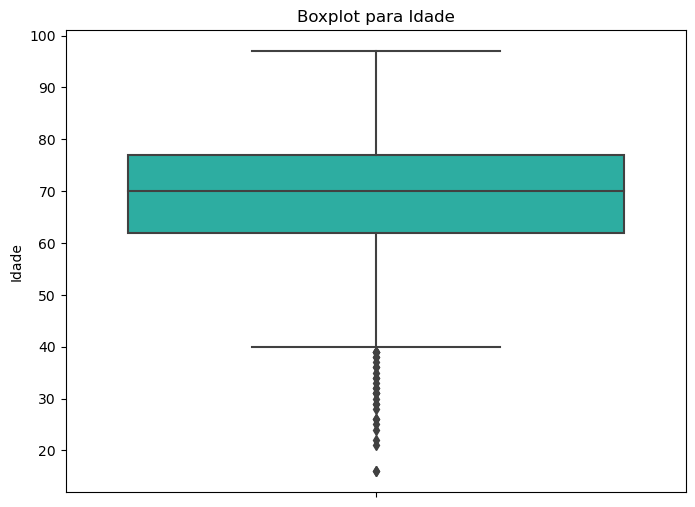

In [220]:
# Criando boxplot para a idade dos participantes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_participantes_pgdc, y='QT_IDADE', color='#17c3b2')
plt.title('Boxplot para Idade')
plt.ylabel('Idade')
plt.savefig('Boxplot para Idade.png', dpi=800)
plt.show()

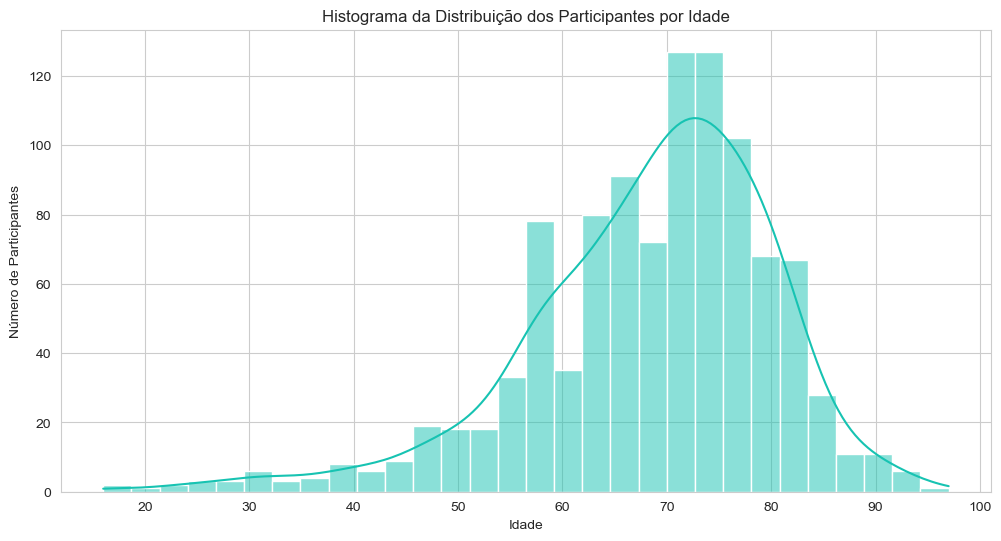

In [221]:
# Configurando o estilo
sns.set_style("whitegrid")

# Criando o histograma para a distribuição de idades dos participantes
plt.figure(figsize=(12, 6))
sns.histplot(df_participantes_pgdc['QT_IDADE'], bins=30, kde=True, color='#17c3b2')
plt.title('Histograma da Distribuição dos Participantes por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Participantes')
plt.savefig('Histograma Distribuição dos Participantes por Idade.png', dpi=800)
plt.show()

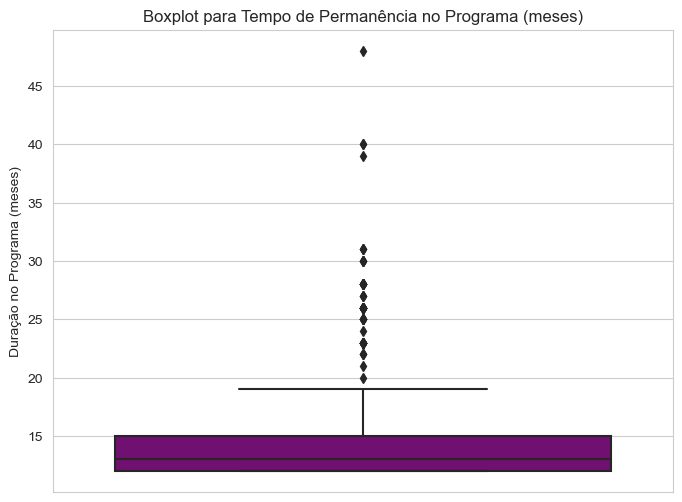

In [222]:
# Criando boxplot para tempo de permanência no programa
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_participantes_pgdc, y='QT_MESES_PROGRAMA', color='purple')
plt.title('Boxplot para Tempo de Permanência no Programa (meses)')
plt.ylabel('Duração no Programa (meses)')
plt.savefig('Boxplot para Tempo de Permanência no Programa (meses).png', dpi=800)
plt.show()


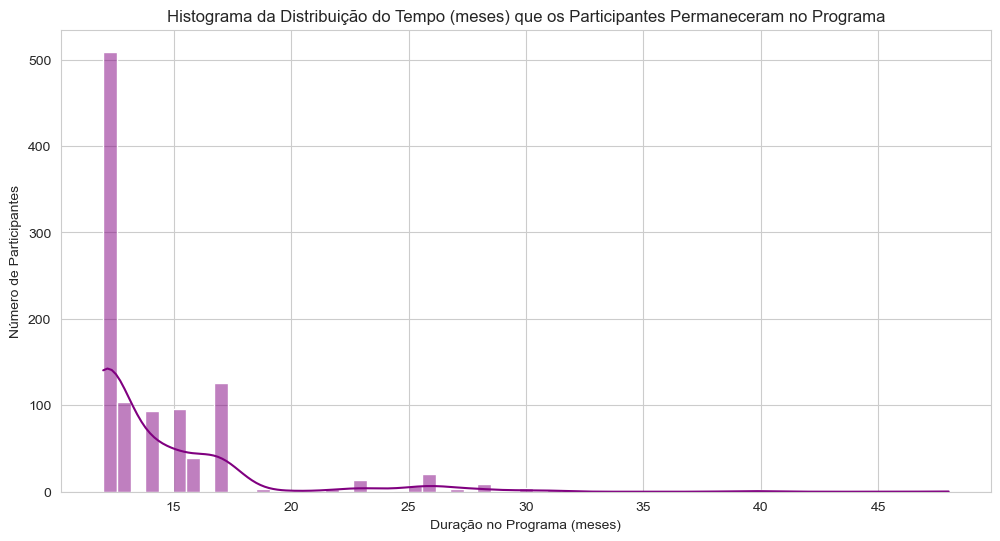

In [223]:
# Criando o histograma para a distribuição do tempo (em meses) que os participantes permaneceram no programa
plt.figure(figsize=(12, 6))
sns.histplot(df_participantes_pgdc['QT_MESES_PROGRAMA'], kde=True, color='purple')
plt.title('Histograma da Distribuição do Tempo (meses) que os Participantes Permaneceram no Programa')
plt.xlabel('Duração no Programa (meses)')
plt.ylabel('Número de Participantes')
plt.savefig('Histograma da Distribuição do Tempo (meses) que os Participantes Permaneceram no Programa.png', dpi=800)
plt.show()


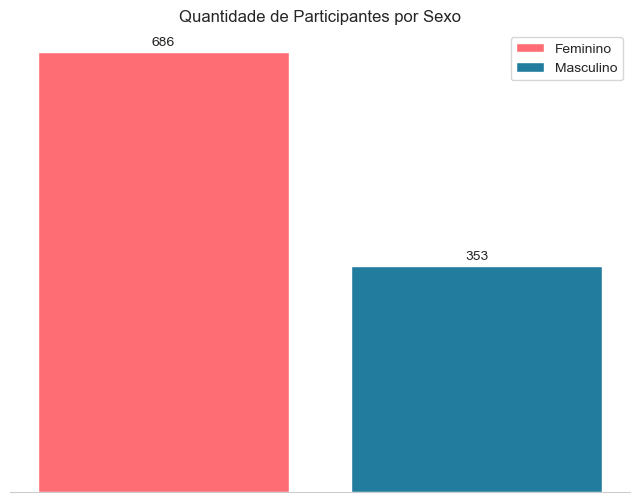

In [224]:
# Obtendo a contagem de valores para cada sexo
qt_sexo = df_participantes_pgdc['DS_SEXO'].value_counts()

# Configurando a figura
fig, ax = plt.subplots(figsize=(8, 6))

# Plotando as barras
bars = ax.bar(qt_sexo.index, qt_sexo.values, color=['#fe6d73', '#227c9d'])

# Adicionando rótulos com as quantidades de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom', fontsize=10)

# Configurando o título e labels dos eixos
ax.set_title('Quantidade de Participantes por Sexo')
ax.set_yticks([])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adicionando a legenda
ax.legend(bars, qt_sexo.index)

plt.savefig('Quantidade de Participantes por Sexo.png', dpi=800)
plt.show()


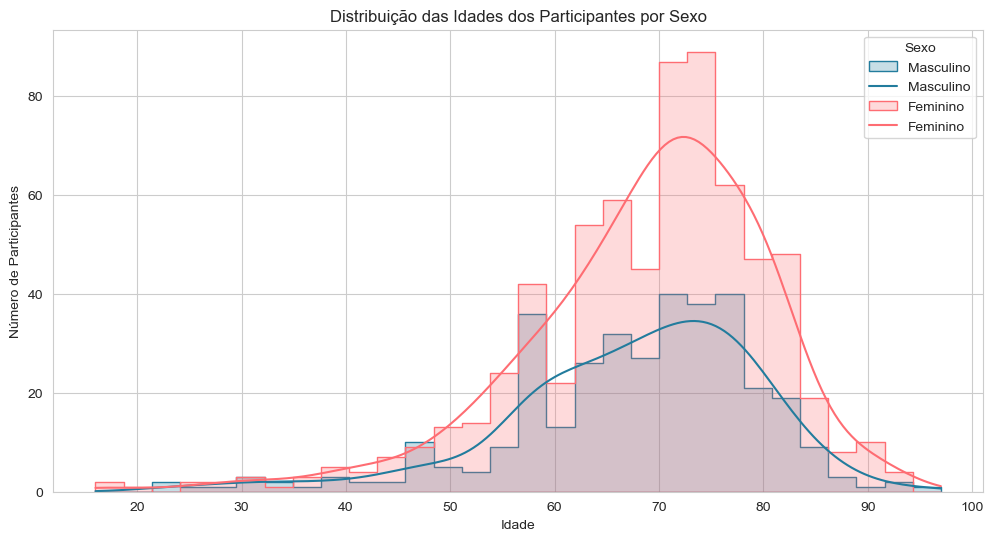

In [225]:
# Definindo as cores para os sexos
palette = {'Masculino': '#227c9d', 'Feminino': '#fe6d73'}

# Criando o histograma para a distribuição da idade por sexos
plt.figure(figsize=(12, 6))
sns.histplot(df_participantes_pgdc, x='QT_IDADE', hue='DS_SEXO', bins=30, kde=True, element="step", common_norm=False, palette=palette, legend=True)
plt.title('Distribuição das Idades dos Participantes por Sexo')
plt.xlabel('Idade')
plt.ylabel('Número de Participantes')
plt.legend(title='Sexo', labels=['Masculino', 'Masculino', 'Feminino', 'Feminino'])
plt.savefig('Histograma da Distribuição das Idades dos Participantes por Sexo.png', dpi=800)
plt.show()


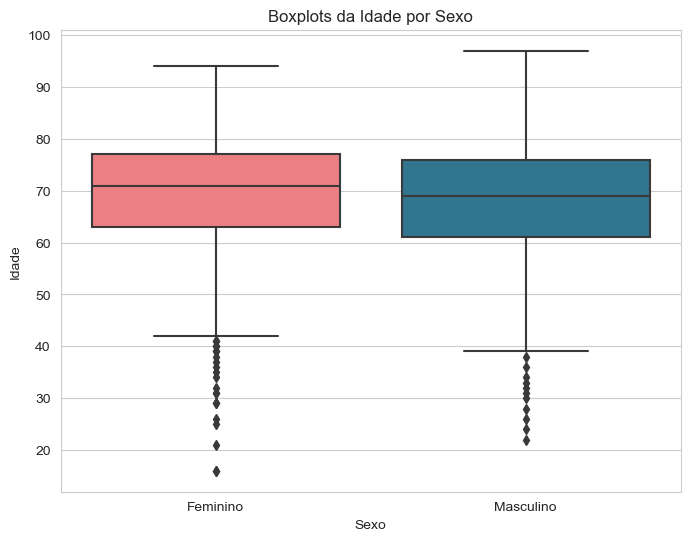

In [226]:
# Criando boxplots separados para idade com base no sexo
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_participantes_pgdc, x='DS_SEXO', y='QT_IDADE', palette=palette)
plt.title('Boxplots da Idade por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.savefig('Boxplot das Idades dos Participantes por Sexo.png', dpi=800)
plt.show()


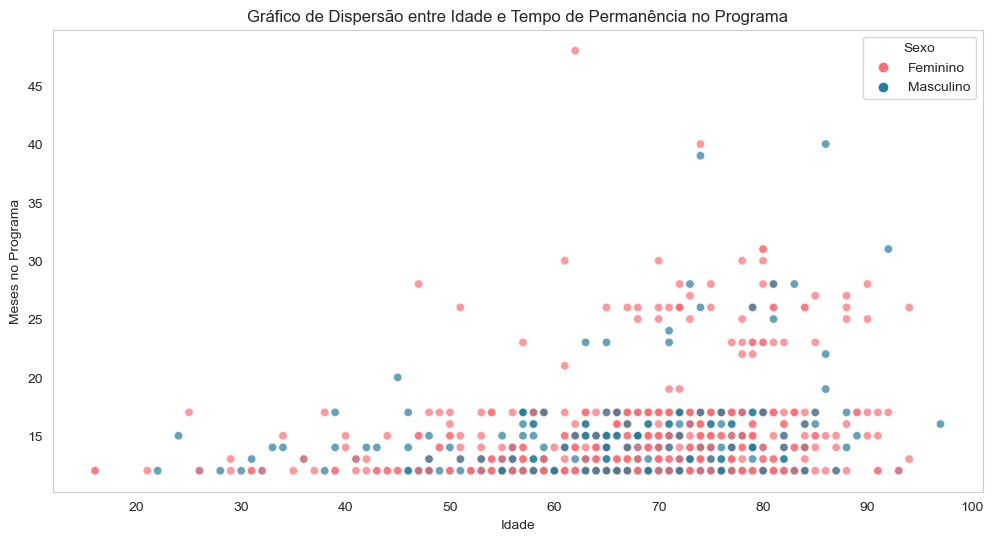

In [227]:
# Criando o gráfico de dispersão entre idade e duração no programa
palette = {'Masculino': '#227c9d', 'Feminino': '#fe6d73'}

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_participantes_pgdc, x='QT_IDADE', y='QT_MESES_PROGRAMA', hue='DS_SEXO', palette= palette, alpha=0.7)
plt.title('Gráfico de Dispersão entre Idade e Tempo de Permanência no Programa')
plt.xlabel('Idade')
plt.ylabel('Meses no Programa')
plt.legend(title='Sexo')
plt.grid(visible = False)
plt.savefig('Gráfico de Dispersão entre Idade e Tempo de Permanência no Programa.png', dpi=800)
plt.show()

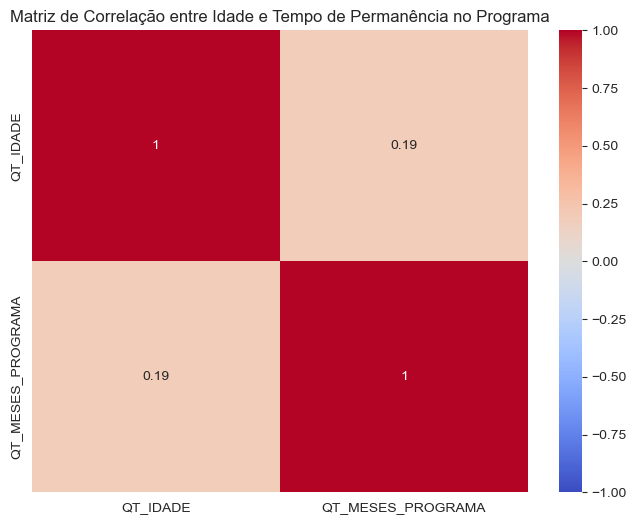

In [228]:
# Calculando a matriz de correlação entre idade e tempo de permanência no programa
matriz_correlacao = df_participantes_pgdc[['QT_IDADE', 'QT_MESES_PROGRAMA']].corr()

# Plotando a matriz de correlação usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Idade e Tempo de Permanência no Programa')
plt.savefig('Matriz de Correlação entre Idade e Tempo de Permanência no Programa.png', dpi=800)
plt.show()

In [229]:
# Calculando a duração média no programa por sexo
tempo_por_sexo = df_participantes_pgdc.groupby('DS_SEXO')['QT_MESES_PROGRAMA'].mean()

# Realizando um teste t para verificar diferenças significativas na duração média no programa entre os sexos
from scipy.stats import ttest_ind

masculino = df_participantes_pgdc[df_participantes_pgdc['DS_SEXO'] == 'Masculino']['QT_MESES_PROGRAMA']
feminino = df_participantes_pgdc[df_participantes_pgdc['DS_SEXO'] == 'Feminino']['QT_MESES_PROGRAMA']

t_stat, p_value = ttest_ind(masculino, feminino)

tempo_por_sexo, p_value

(DS_SEXO
 Feminino     14.555394
 Masculino    13.818697
 Name: QT_MESES_PROGRAMA, dtype: float64,
 0.004076408759577925)

A duração média no programa, separada por sexo, é:

Feminino: Aproximadamente 
14.57 meses.
Masculino: Aproximadamente 
13.80 meses.
Realizamos um teste t para verificar se há diferenças significativas na duração média no programa entre os sexos. O valor-p obtido foi 
0.0041, que é menor que 
0.05. Isso indica que existe uma diferença estatisticamente significativa na duração média no programa entre os sexos, com as participantes do sexo feminino tendo uma duração média ligeiramente maior no programa em comparação com os do sexo masculino.

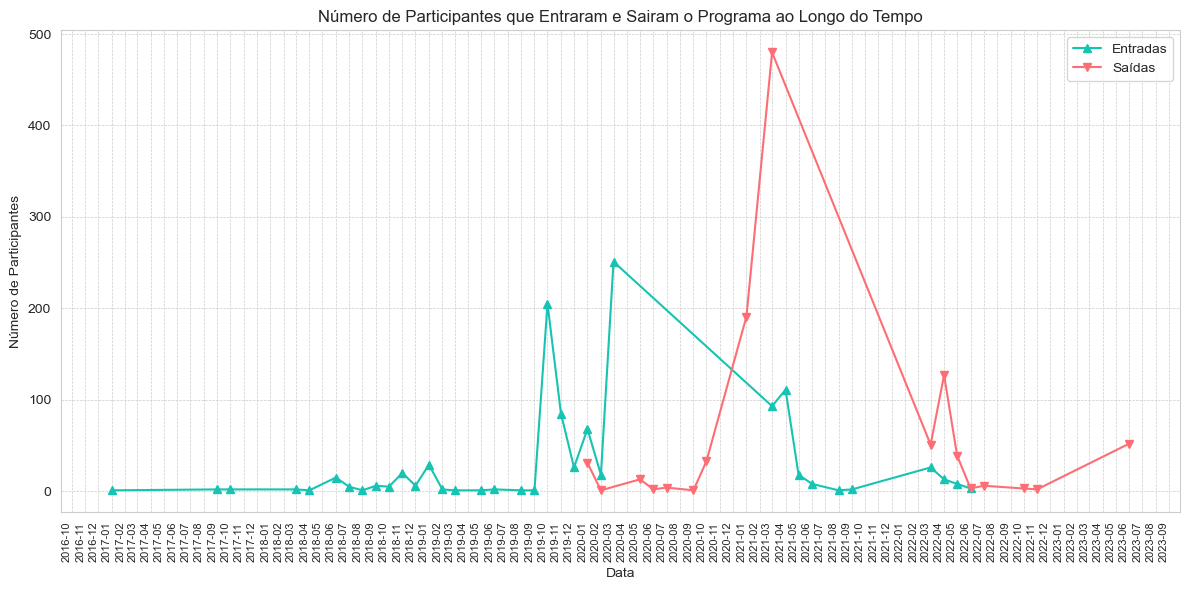

In [230]:
# Importando o módulo dates
import matplotlib.dates as mdates

# Agrupando os dados por data de início e fim para contar o número de participantes
inicio = df_participantes_pgdc.groupby('DT_COMPETENCIA_INICIO_ACOMP').size()
termino = df_participantes_pgdc.groupby('DT_COMPETENCIA_FIM_ACOMP').size()

# Plotando a série temporal
plt.figure(figsize=(12, 6))
inicio.plot(label='Entradas', marker='^', color='#17c3b2', linewidth=1.5)
termino.plot(label='Saídas', marker='v', color='#fe6d73', linewidth=1.5)
plt.title('Número de Participantes que Entraram e Sairam o Programa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Participantes')

# Aumentando a quantidade de ticks no eixo x
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotacionando os rótulos para melhor visualização
plt.xticks(rotation=90, fontsize=8)

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('Número de Participantes que Iniciaram ou Terminaram o Programa ao Longo do Tempo.png', dpi=800)
plt.show()

In [231]:
# Resumo das estatísticas descritivas do dataframe df_agregado
df_agregado.describe()

,QT_MESES_PROGRAMA,QT_IDADE,CD_ESTRATIFICACAO,VL_TOTAL_CONTA_MEDICA,VL_CALCULO_RECEITA,QT_MES_REFERENCIA
count,77881.000000,77881.000000,77310.000000,77881.000000,77881.000000,77881.000000
mean,14.304465,68.489067,4.238016,1088.725296,629.854705,-0.620280
std,3.920094,11.821668,0.957026,5618.250969,305.392674,24.362554
min,12.000000,16.000000,1.000000,0.000000,-1339.750000,-65.000000
25%,12.000000,62.000000,3.000000,0.000000,410.690000,-20.000000
50%,13.000000,70.000000,5.000000,132.590000,591.310000,-1.000000
75%,15.000000,77.000000,5.000000,487.070000,792.800000,19.000000
max,48.000000,97.000000,5.000000,270699.820000,7568.040000,77.000000


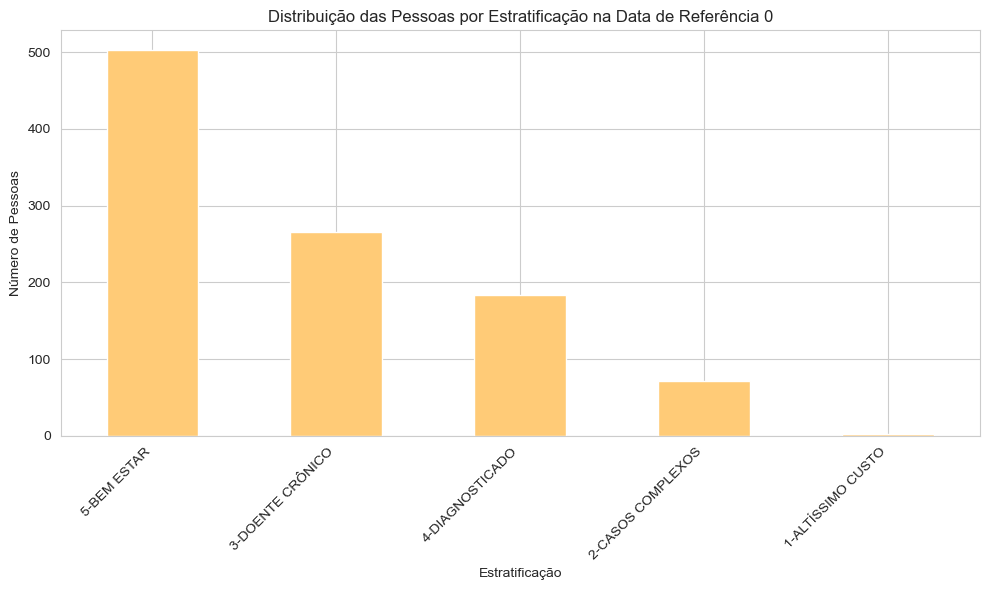

In [232]:
# Estratificação das pessoas participantes do programa no mês inicial de acompanhamento 
estratificacao_0 = df_agregado[df_agregado.QT_MES_REFERENCIA == 0]['DS_ESTRATIFICACAO'].value_counts()

plt.figure(figsize=(10, 6))
estratificacao_0.plot(kind='bar', color='#ffcb77')
plt.title("Distribuição das Pessoas por Estratificação na Data de Referência 0")
plt.xlabel("Estratificação")
plt.ylabel("Número de Pessoas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Distribuição das Pessoas por Estratificação na Data de Referência 0.png', dpi=800)
plt.show()

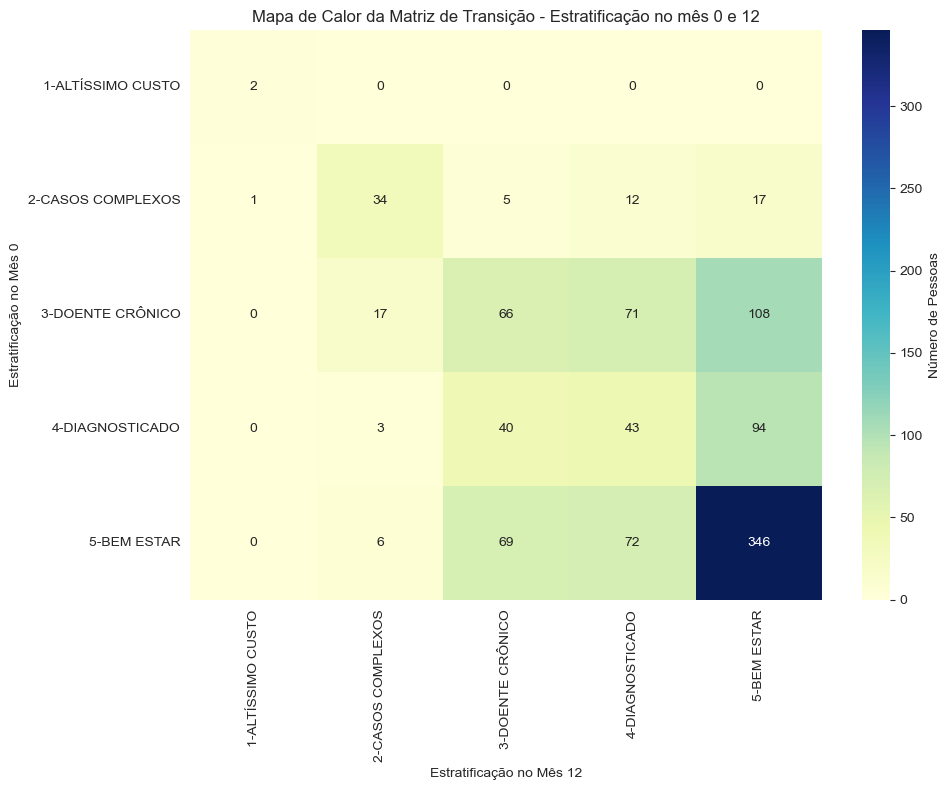

In [233]:
# Separando as estratificações dos participantes no mês de referência 0 e 12
df_estratificacao_0 = df_agregado[df_agregado.QT_MES_REFERENCIA == 0][['CD_PESSOA_FISICA', 'DS_ESTRATIFICACAO']]
df_estratificacao_12 = df_agregado[df_agregado.QT_MES_REFERENCIA == 12][['CD_PESSOA_FISICA', 'DS_ESTRATIFICACAO']]

# Renomeando as colunas
df_estratificacao_0 = df_estratificacao_0.rename(columns={'DS_ESTRATIFICACAO': 'DS_ESTRATIFICACAO_0'})
df_estratificacao_12 = df_estratificacao_12.rename(columns={'DS_ESTRATIFICACAO': 'DS_ESTRATIFICACAO_12'})

# Uniãos dos dois dataframes pela CD_PESSOA_FISICA
df_estratificacao = pd.merge(df_estratificacao_0, df_estratificacao_12, on='CD_PESSOA_FISICA', how='inner')

# Criando a matriz de transição
matriz_transicao = pd.crosstab(df_estratificacao['DS_ESTRATIFICACAO_0'], df_estratificacao['DS_ESTRATIFICACAO_12'])

# Criando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_transicao, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Número de Pessoas'}) #'YlGnBu', 'viridis', 'magma', 'Spectral'
plt.title("Mapa de Calor da Matriz de Transição - Estratificação no mês 0 e 12")
plt.xlabel("Estratificação no Mês 12")
plt.ylabel("Estratificação no Mês 0")
plt.tight_layout()
#plt.savefig('Mapa de Calor da Matriz de Transição - Estratificação no mês 0 e 12.png', dpi=800)
plt.show()

In [234]:
import plotly.graph_objects as go

# Filtrar o dataframe para obter as linhas onde QT_MES_REFERENCIA é igual a 0 e 12
df_0 = df_agregado[df_agregado.QT_MES_REFERENCIA == 0][['CD_PESSOA_FISICA', 'DS_ESTRATIFICACAO']]
df_12 = df_agregado[df_agregado.QT_MES_REFERENCIA == 12][['CD_PESSOA_FISICA', 'DS_ESTRATIFICACAO']]

# Renomear as colunas para facilitar a junção
df_0 = df_0.rename(columns={'DS_ESTRATIFICACAO': 'DS_ESTRATIFICACAO_0'})
df_12 = df_12.rename(columns={'DS_ESTRATIFICACAO': 'DS_ESTRATIFICACAO_12'})

# Mesclar os dois dataframes em CD_PESSOA_FISICA
df_transition = pd.merge(df_0, df_12, on='CD_PESSOA_FISICA', how='inner')

# Filtrar para apenas pessoas na estratificação 'BEM ESTAR (PADRÃO 5)' no mês 0
df_transition_filtered = df_transition[df_transition['DS_ESTRATIFICACAO_0'] == '5-BEM ESTAR']

# Criar um par source-target para cada transição filtrada
source_target_filtered = df_transition_filtered.groupby(['DS_ESTRATIFICACAO_0', 'DS_ESTRATIFICACAO_12']).size().reset_index(name='count')

# Extrair rótulos exclusivos e atribuir índices
labels_filtered = list(pd.concat([source_target_filtered['DS_ESTRATIFICACAO_0'], source_target_filtered['DS_ESTRATIFICACAO_12']]).unique())
source_target_filtered['source'] = source_target_filtered['DS_ESTRATIFICACAO_0'].apply(lambda x: labels_filtered.index(x))
source_target_filtered['target'] = source_target_filtered['DS_ESTRATIFICACAO_12'].apply(lambda x: labels_filtered.index(x))

# Criar o diagrama Sankey
fig_filtered = go.Figure(go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels_filtered),
    link=dict(source=source_target_filtered['source'], target=source_target_filtered['target'], value=source_target_filtered['count'])
))

fig_filtered.update_layout(title_text="Transição da Estratificação de 0 para 12 meses (Filtrado para 'BEM ESTAR' no mês 0)", font_size=10)
fig_filtered.show()

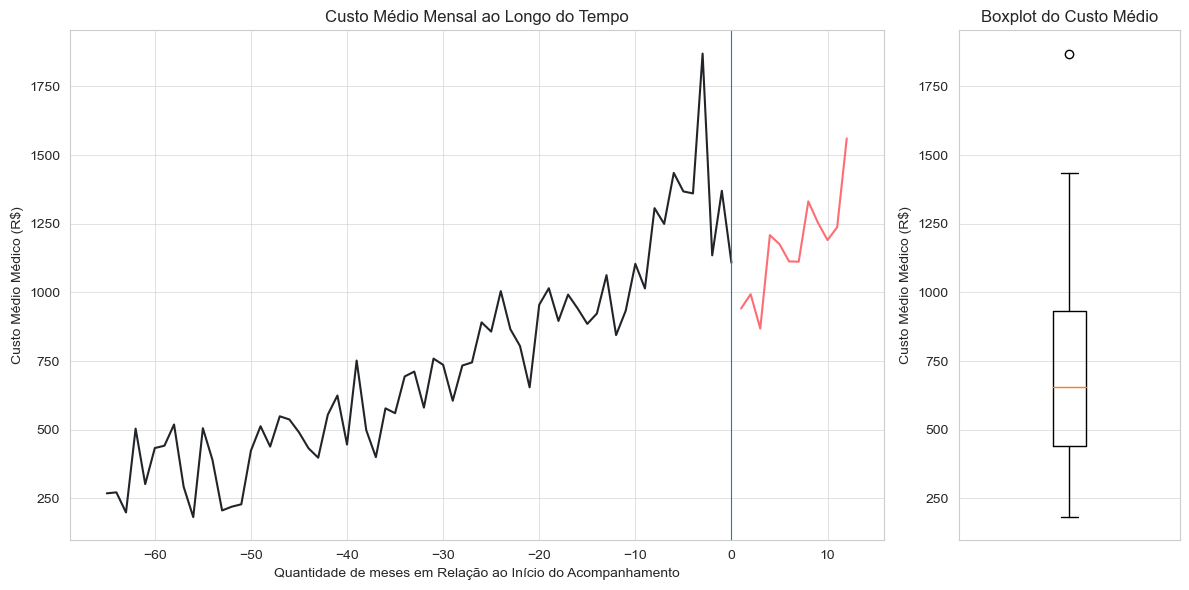

In [235]:
# Ajustando os tamanhos dos gráficos, diminuindo o tamanho do boxplot
fig = plt.figure(figsize=(12,6))
grid_spec = fig.add_gridspec(1, 4)  # Criando um layout de grid 1x4

# Gráfico de séries temporais
ax0 = fig.add_subplot(grid_spec[0, :3])  # Ocupando as primeiras 3 colunas do grid
ax0.plot(df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] <= 0]['QT_MES_REFERENCIA'],
         df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] <= 0]['VL_CUSTO_MEDIO'], 
         linestyle='-', color='#212529', linewidth = 1.5)
ax0.plot(df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] > 0]['QT_MES_REFERENCIA'],
         df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] > 0]['VL_CUSTO_MEDIO'], 
         linestyle='-', color='#fe6d73', linewidth = 1.5)
ax0.axvline(x=0, color='#227c9d', linestyle='-', linewidth = 0.8)
ax0.set_title('Custo Médio Mensal ao Longo do Tempo')
ax0.set_xlabel('Quantidade de meses em Relação ao Início do Acompanhamento')
ax0.set_ylabel('Custo Médio Médico (R$)')
ax0.grid(True, linewidth = 0.4)

# Boxplot
custo_medio_pre = df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] < 0]['VL_CUSTO_MEDIO']
ax1 = fig.add_subplot(grid_spec[0, 3])  # Ocupando apenas a última coluna do grid
ax1.boxplot(custo_medio_pre)
ax1.set_title('Boxplot do Custo Médio')
ax1.set_ylabel('Custo Médio Médico (R$)')
ax1.set_xticks([])
ax1.grid(True, linewidth = 0.4)

plt.savefig('Custo Médio Mensal ao Longo do Tempo.png', dpi=800)

plt.tight_layout()
plt.show()


# **5.Criação de Modelos de Machine Learning**

## **5.1 Holt-Winters**

In [236]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

In [237]:
# Dados para serem utilizados no treinamento e teste dos modelos
colunas_remover = ['VL_TOTAL_CONTA_MEDICA','QT_CD_PESSOA_FISICA_DISTINCT']
df_modelos = df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] <= 0]
df_modelos = df_modelos.drop(colunas_remover, axis=1)

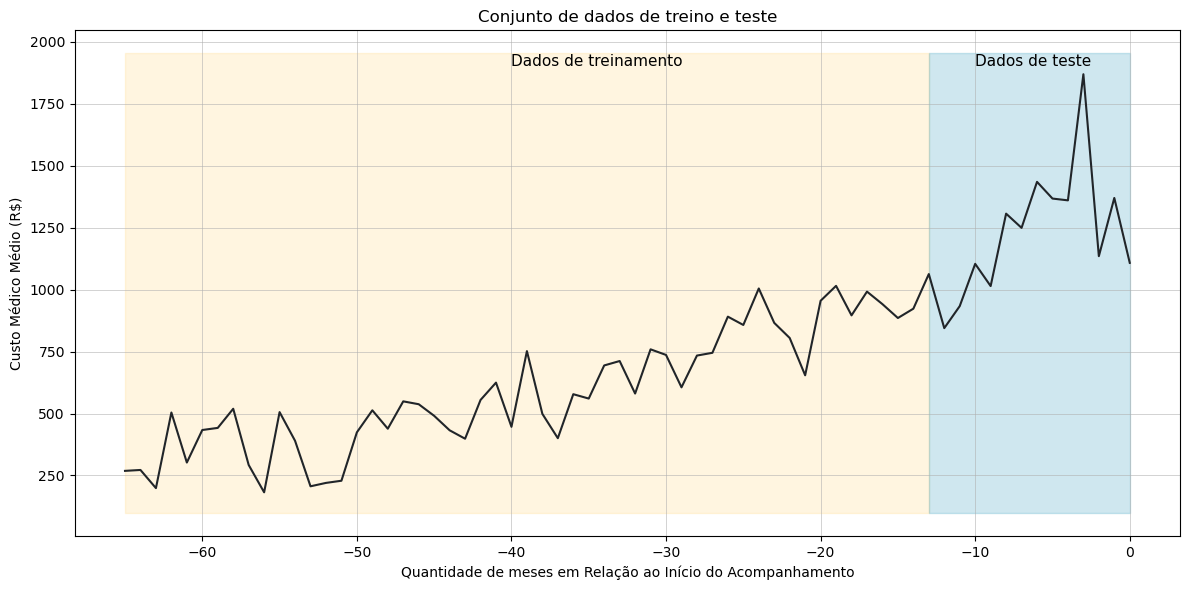

In [308]:
# Gráfico
plt.figure(figsize=(12,6))
plt.plot(df_modelos['QT_MES_REFERENCIA'], df_modelos['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)

y_min = plt.ylim()[0]
y_max = plt.ylim()[1]

plt.text(-40, y_max-50, 'Dados de treinamento', fontsize=11, color='black')
plt.text(-10, y_max-50, 'Dados de teste', fontsize=11, color='black')

plt.fill_between(df_modelos['QT_MES_REFERENCIA'], y_min, y_max, where=(df_modelos['QT_MES_REFERENCIA'] <= -13), color='#ffd166', alpha=0.2)
plt.fill_between(df_modelos['QT_MES_REFERENCIA'], y_min, y_max, where=(df_modelos['QT_MES_REFERENCIA'] >= -13), color='#118ab2', alpha=0.2)

plt.title('Conjunto de dados de treino e teste')
plt.xlabel('Quantidade de meses em Relação ao Início do Acompanhamento')
plt.ylabel('Custo Médico Médio (R$)')

plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.savefig('Conjunto de dados de treino e teste.png', dpi=800)
plt.show()

In [238]:
# Dividir os dados em conjuntos de treinamento e teste
dados_treino = df_modelos[df_modelos['QT_MES_REFERENCIA'] <= -13]
dados_teste = df_modelos[df_modelos['QT_MES_REFERENCIA'] > -13]

# Mostrar os tamanhos dos conjuntos de treinamento e teste
len(dados_treino), len(dados_teste)

(53, 13)

In [239]:
# Função para definir os parâmetros do modelo HW com base no MAE
def holt_winters_mae(trend, seasonal, seasonal_periods, data):
    try:
        modelo = ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
        fit_modelo = modelo.fit()
        mae = np.mean(np.abs(data - fit_modelo.fittedvalues))
        return mae
    except:
        return np.inf

# Parâmetros possíveis para o modelo Holt-Winters
trends = [None, 'add', 'mul']
seasonals = [None, 'add', 'mul']
seasonal_periods = list(range(1, 25))

# Busca otimizada dos melhores parâmetros usando MAE
min_mae = np.inf
melhores_params_mae = None
for trend in trends:
    for seasonal in seasonals:
        for seasonal_period in seasonal_periods:
            mae = holt_winters_mae(trend, seasonal, seasonal_period, dados_treino['VL_CUSTO_MEDIO'])
            if mae < min_mae:
                min_mae = mae
                melhores_params_mae = (trend, seasonal, seasonal_period)
                
print(f"Parâmetros otimizados para menor MAE: {melhores_params_mae}")
print(f"Menor MAE: {min_mae}")

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinter

Parâmetros otimizados para menor MAE: ('mul', 'add', 14)
Menor MAE: 68.12974094024543


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul



In [240]:
# Função para definir os parâmetros do modelo HW com base no AIC
def holt_winters_aic(trend, seasonal, seasonal_periods, dados):
    try:
        modelo = ExponentialSmoothing(dados, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
        fit_modelo = modelo.fit()
        aic = fit_modelo.aic
        return aic
    except:
        return np.inf

# Parâmetros possíveis para o modelo Holt-Winters
trends = [None, 'add', 'mul']
seasonals = [None, 'add', 'mul']
seasonal_periods = list(range(1, 25))

# Busca otimizada dos melhores parâmetros usando AIC
min_aic = np.inf
melhores_params_aic = None
for trend in trends:
    for seasonal in seasonals:
        for seasonal_period in seasonal_periods:
            aic = holt_winters_aic(trend, seasonal, seasonal_period, dados_treino['VL_CUSTO_MEDIO'])
            if aic < min_aic:
                min_aic = aic
                melhores_params_aic = (trend, seasonal, seasonal_period)

print(f"Parâmetros otimizados para menor AIC: {melhores_params_aic}") 
print(f"Menor AIC: {min_aic}")

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinter

Parâmetros otimizados para menor AIC: ('mul', None, 1)
Menor AIC: 507.3251680145725


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul



In [241]:
# Treinamento do modelo Holt-Winters
modelo_hw = ExponentialSmoothing(dados_treino['VL_CUSTO_MEDIO'], trend='mul', seasonal_periods=1) #Menor AIC

fit_modelo_hw = modelo_hw.fit()

# Parâmetros do modelo treinado
print('Parâmetros do modelo:')
fit_modelo_hw.params

Parâmetros do modelo:


c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul



{'smoothing_level': 0.11647270874385808,
 'smoothing_trend': 0.029445346014794396,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 298.38843041803347,
 'initial_trend': 1.0240393808429609,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [242]:
# Valor AIC
aic_hw = fit_modelo_hw.aic
print(aic)

585.6632678448926


In [243]:
# Previsão dos valores de VL_CUSTO_MEDIO do período de teste
y_pred_hw = fit_modelo_hw.forecast(steps=13)

y_real = dados_teste['VL_CUSTO_MEDIO']

# Calculo das métricas de erro
mae_hw = mean_absolute_error(y_real, y_pred_hw)
mse_hw = mean_squared_error(y_real, y_pred_hw)
rmse_hw = np.sqrt(mse_hw)
mape_hw = mean_absolute_percentage_error(y_real, y_pred_hw)

mae_hw = round(mae_hw, 2)
mse_hw = round(mse_hw, 2)
rmse_hw = round(rmse_hw, 2)
mape_hw = round(mape_hw, 2)

print("Métricas de Erro (Holt-Winters):\n")
print(f"MAE (Erro Absoluto Médio): {mae_hw}")
print(f"MSE (Erro Quadrático Médio): {mse_hw}")
print(f"RSME (Raiz do Erro Quadrático Médio): {rmse_hw}")
print(f"MAPE (Erro Absoluto Percentual Médio): {mape_hw}%")

Métricas de Erro (Holt-Winters):

MAE (Erro Absoluto Médio): 168.09
MSE (Erro Quadrático Médio): 47301.03
RSME (Raiz do Erro Quadrático Médio): 217.49
MAPE (Erro Absoluto Percentual Médio): 0.14%


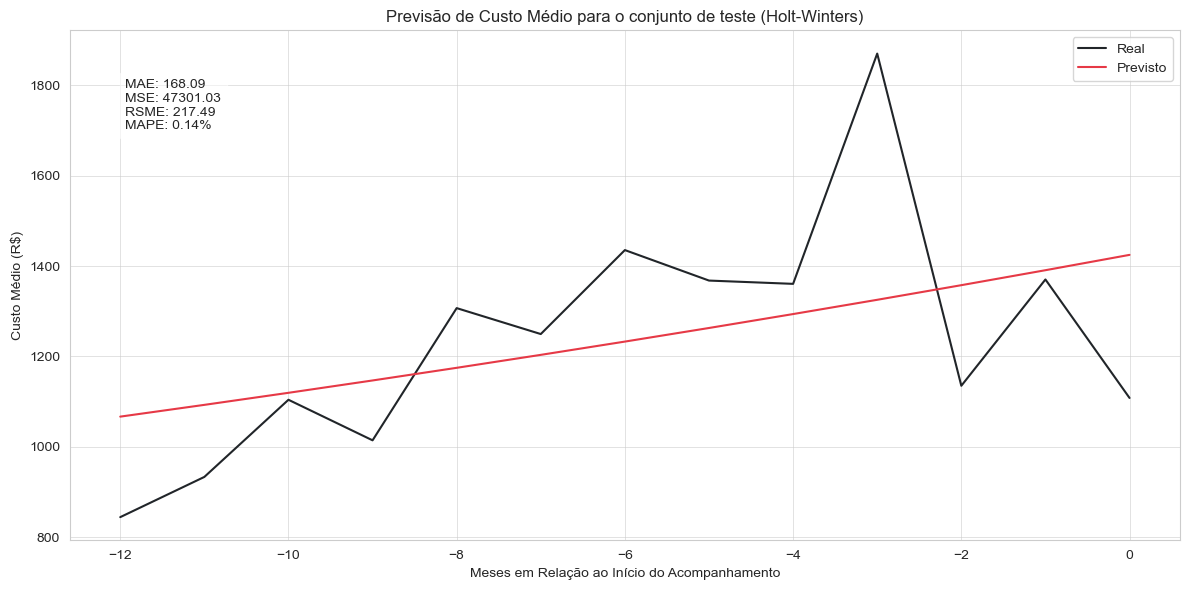

In [244]:
# Gráfico dos valores de teste reais e os previstos
plt.figure(figsize=(12,6))
plt.plot(dados_teste['QT_MES_REFERENCIA'], dados_teste['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)
plt.plot(dados_teste['QT_MES_REFERENCIA'], y_pred_hw, label='Previsto', color='#e63946', linewidth = 1.5)
plt.title('Previsão de Custo Médio para o conjunto de teste (Holt-Winters)')
plt.xlabel('Meses em Relação ao Início do Acompanhamento')
plt.ylabel('Custo Médio (R$)')
plt.legend()

# Adicionando métricas ao gráfico
plt.text(0.05, 0.80, 
         f'MAE: {mae_hw}\nMSE: {mse_hw}\nRSME: {rmse_hw}\nMAPE: {mape_hw}%', 
         transform=plt.gca().transAxes, 
         va='bottom', 
         ha='left', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.savefig('Previsão de Custo Médio para o conjunto de teste (Holt-Winters).png', dpi=800)
plt.show()

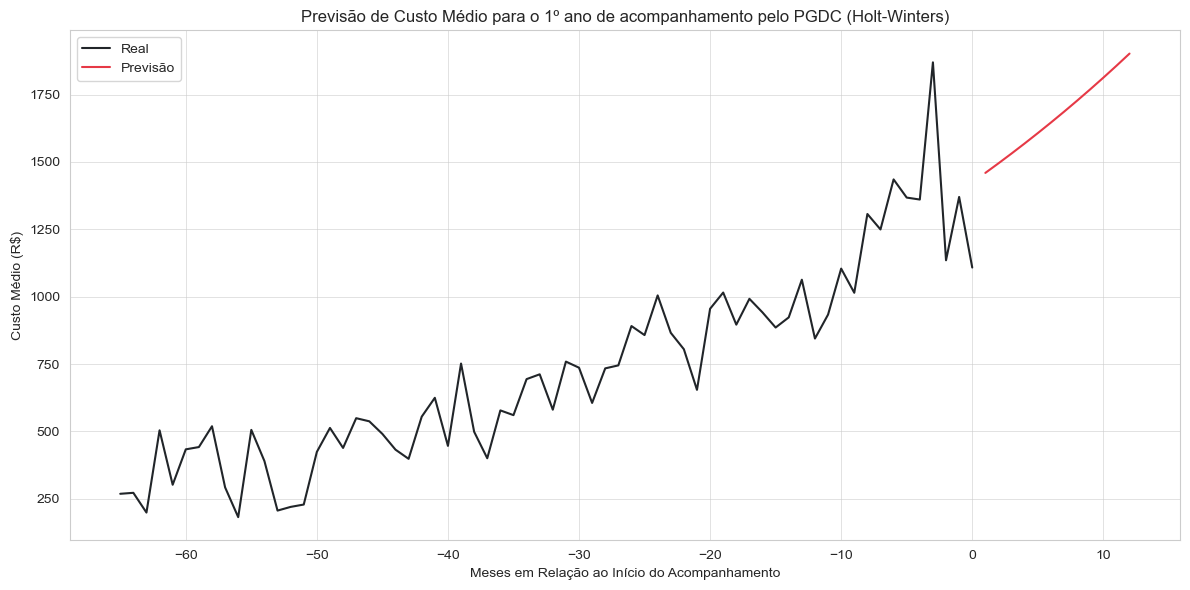

In [245]:
# Previsão dos valores de VL_CUSTO_MEDIO para 12 meses após o início do acompanhamento
previsao_hw = fit_modelo_hw.forecast(steps=25)

# Plote dos dados reais e previstos
plt.figure(figsize=(12,6))
plt.plot(df_modelos['QT_MES_REFERENCIA'], df_modelos['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)
plt.plot(range(1, 13), previsao_hw.tail(12), label='Previsão', color='#e63946', linewidth = 1.5)
plt.title('Previsão de Custo Médio para o 1º ano de acompanhamento pelo PGDC (Holt-Winters)')
plt.xlabel('Meses em Relação ao Início do Acompanhamento')
plt.ylabel('Custo Médio (R$)')
plt.legend()
plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.show()

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul



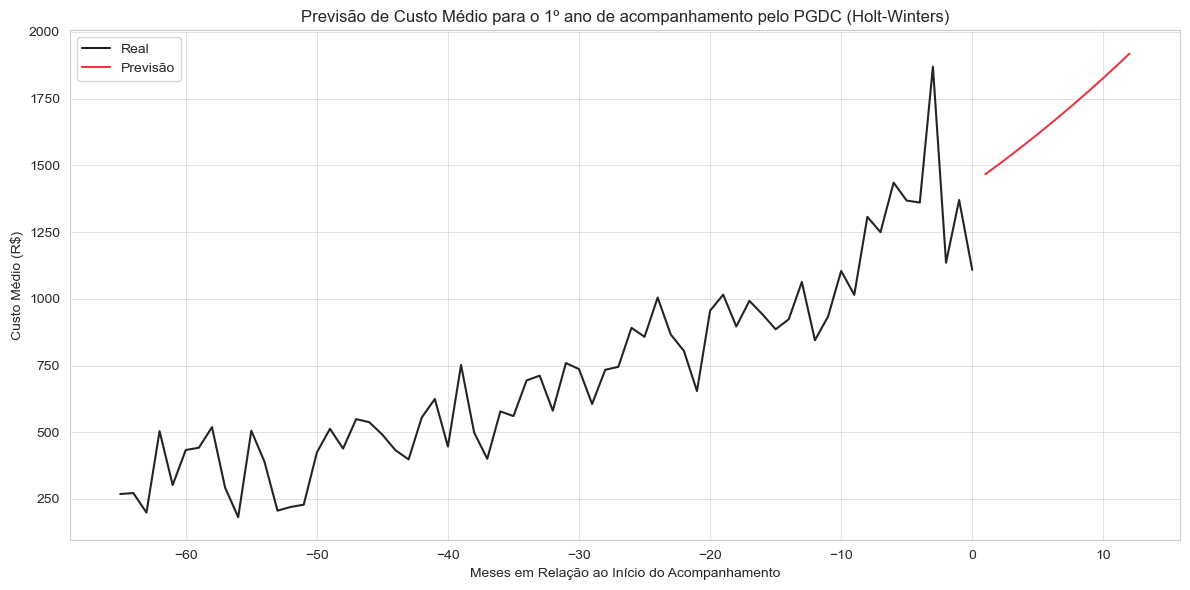

In [246]:
modelo_hw = ExponentialSmoothing(df_modelos['VL_CUSTO_MEDIO'], trend='mul', seasonal_periods=1)
fit_modelo_hw = modelo_hw.fit()

# Previsão dos valores de VL_CUSTO_MEDIO para 12 meses após o início do acompanhamento
previsao_hw = fit_modelo_hw.forecast(steps=12)

# Plote dos dados reais e previstos
plt.figure(figsize=(12,6))
plt.plot(df_modelos['QT_MES_REFERENCIA'], df_modelos['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)
plt.plot(range(1, 13), previsao_hw, label='Previsão', color='#e63946', linewidth = 1.5)
plt.title('Previsão de Custo Médio para o 1º ano de acompanhamento pelo PGDC (Holt-Winters)')
plt.xlabel('Meses em Relação ao Início do Acompanhamento')
plt.ylabel('Custo Médio (R$)')
plt.legend()
plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.show()

## **5.2 ARIMA**

In [247]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

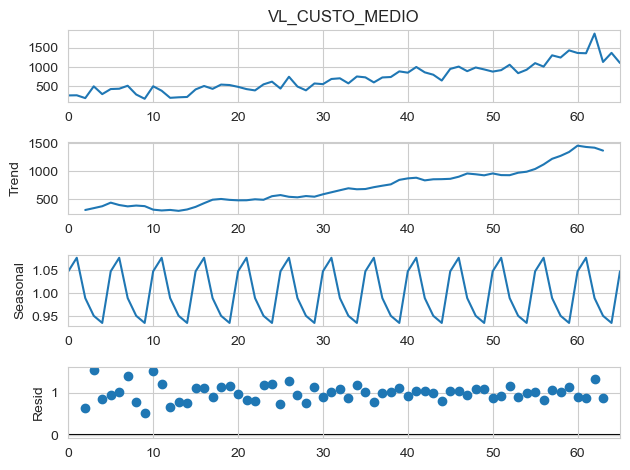

In [248]:
# Decompondo a série usando o argumento period (MODELO MULTIPLICATIVO)
decomposicao_mod_mult = seasonal_decompose(df_modelos['VL_CUSTO_MEDIO'], model='multiplicative', period=5)

# Plote da decomposição
decomposicao_mod_mult.plot()
plt.tight_layout()
plt.show()

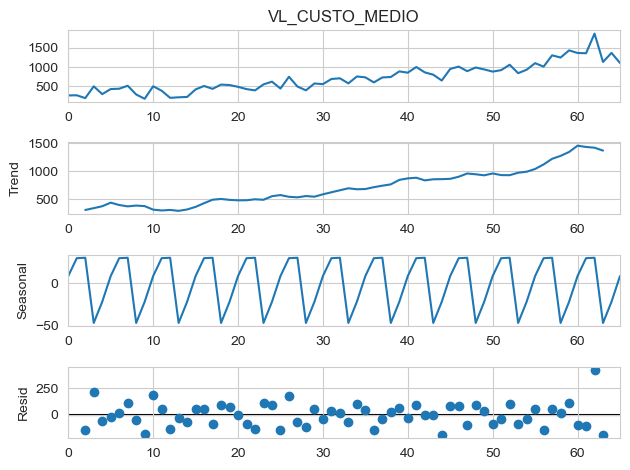

In [249]:
# Decompondo a série usando o argumento period (MODELO ADITIVO)
decomposicao_mod_adit = seasonal_decompose(df_modelos['VL_CUSTO_MEDIO'], model='aditive', period=5)

# Plote da decomposição
decomposicao_mod_adit.plot()
plt.tight_layout()
plt.show()

In [250]:
#Teste Dick-Fuller (Estacionariedade)
from statsmodels.tsa.stattools import adfuller
y = dados_treino['VL_CUSTO_MEDIO']
teste_adfuller = adfuller(y)

# Valores p <= 0.05 afirma que a série é estacionária
print('Valor-p %f' %teste_adfuller[1])

Valor-p 0.933673


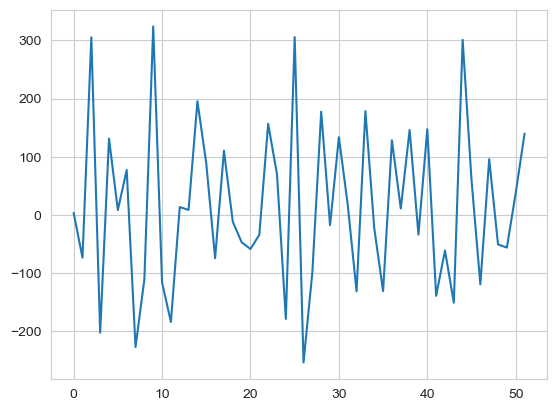

In [251]:
# Transformar a série em estacionaria, através da diferenciação da série
y_diff = np.diff(y)
plt.plot(y_diff)

In [252]:
# Aplicação do teste Dick-Fuller para a série diferenciada
teste_adfuller_02 = adfuller(y_diff)
print('Valor-p %f' %teste_adfuller_02[1])

Valor-p 0.000044


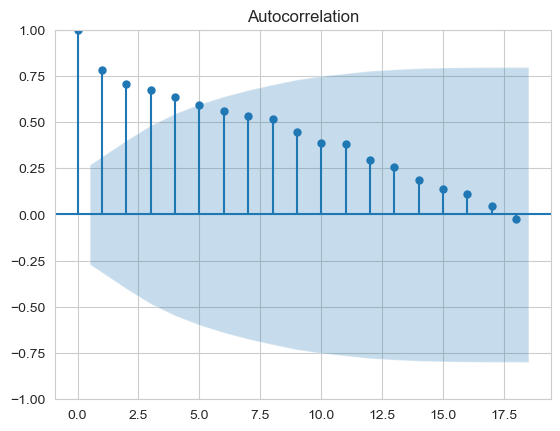

In [253]:
# Gráfico de autocorrelação
plot_acf(dados_treino['VL_CUSTO_MEDIO'])
plt.show()

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



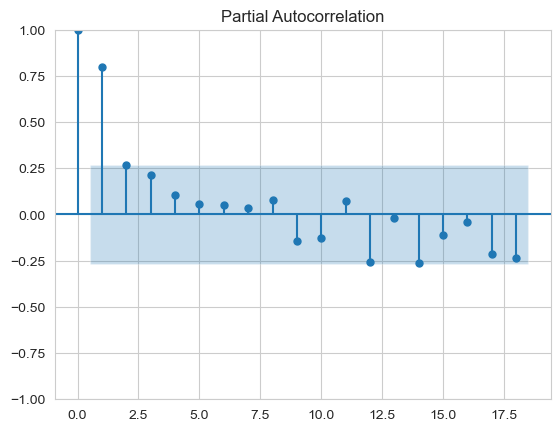

In [254]:
# Gráfico de autocorrelação parcial
plot_pacf(dados_treino['VL_CUSTO_MEDIO'])
plt.show()

In [255]:
# Modelo ARIMA
modelo_arima = ARIMA(dados_treino['VL_CUSTO_MEDIO'], order=(2,1,5))
fit_modelo_arima = modelo_arima.fit()
print(fit_modelo_arima.summary())

                               SARIMAX Results                                
Dep. Variable:         VL_CUSTO_MEDIO   No. Observations:                   53
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -321.997
Date:                Sun, 24 Sep 2023   AIC                            659.993
Time:                        07:17:35   BIC                            675.603
Sample:                             0   HQIC                           665.978
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0801      0.258     -4.187      0.000      -1.586      -0.574
ar.L2         -0.8366      0.262     -3.195      0.001      -1.350      -0.323
ma.L1          0.5810      0.807      0.720      0.4

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [256]:
# Valor AIC
aic_arima = fit_modelo_arima.aic
print(aic_arima)

659.9934339479395


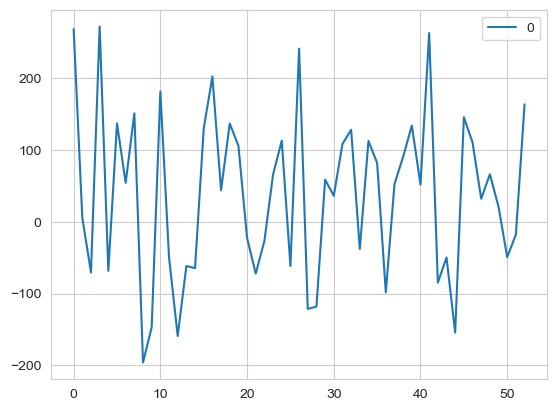

In [257]:
# Gráfico dos resíduos do modelo ARIMA
residuos = pd.DataFrame(fit_modelo_arima.resid)
residuos.plot()
plt.show()

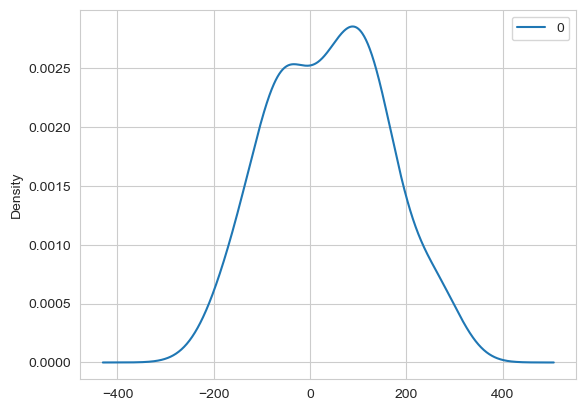

                0
count   53.000000
mean    38.405632
std    117.845396
min   -196.126415
25%    -61.669090
50%     51.859808
75%    128.243647
max    272.247908


In [258]:
# Distribuição dos resíduos do modelo ARIMA
residuos.plot(kind='kde')
plt.show()
print(residuos.describe())

In [259]:
# Previsão do conjunto de teste com ARIMA(2,1,5)
y_pred_arima = fit_modelo_arima.forecast(steps=13)

y_real = dados_teste['VL_CUSTO_MEDIO']

# Calculo das métricas de erro
mae_arima = mean_absolute_error(y_real, y_pred_arima)
mse_arima = mean_squared_error(y_real, y_pred_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = mean_absolute_percentage_error(y_real, y_pred_arima)

mae_arima = round(mae_arima, 2)
mse_arima = round(mse_arima, 2)
rmse_arima = round(rmse_arima, 2)
mape_arima = round(mape_arima, 2)

print("Métricas de Erro (ARIMA (2,1,5)):\n")
print(f"MAE (Erro Absoluto Médio): {mae_arima}")
print(f"MSE (Erro Quadrático Médio): {mse_arima}")
print(f"RSME (Raiz do Erro Quadrático Médio): {rmse_arima}")
print(f"MAPE (Erro Absoluto Percentual Médio): {mape_arima}%")

Métricas de Erro (ARIMA (2,1,5)):

MAE (Erro Absoluto Médio): 285.05
MSE (Erro Quadrático Médio): 127088.61
RSME (Raiz do Erro Quadrático Médio): 356.49
MAPE (Erro Absoluto Percentual Médio): 0.21%


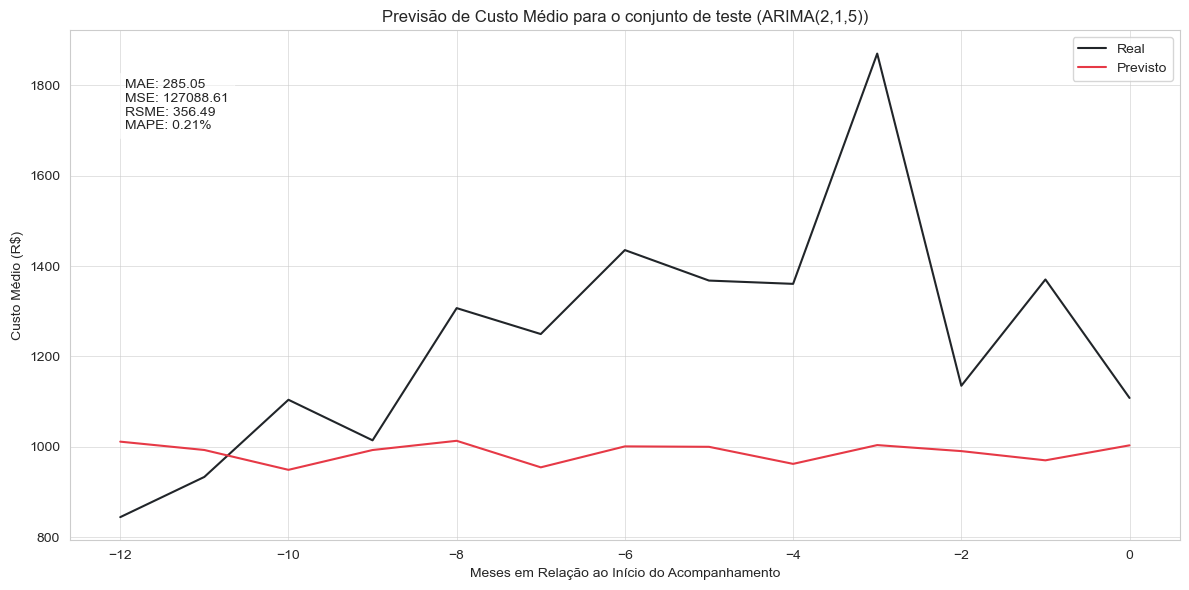

In [260]:
# Gráfico dos valores de teste reais e os previstos
plt.figure(figsize=(12,6))
plt.plot(dados_teste['QT_MES_REFERENCIA'], dados_teste['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)
plt.plot(dados_teste['QT_MES_REFERENCIA'], y_pred_arima, label='Previsto', color='#e63946', linewidth = 1.5)
plt.title('Previsão de Custo Médio para o conjunto de teste (ARIMA(2,1,5))')
plt.xlabel('Meses em Relação ao Início do Acompanhamento')
plt.ylabel('Custo Médio (R$)')
plt.legend()

# Adicionando métricas ao gráfico
plt.text(0.05, 0.80, 
         f'MAE: {mae_arima}\nMSE: {mse_arima}\nRSME: {rmse_arima}\nMAPE: {mape_arima}%', 
         transform=plt.gca().transAxes, 
         va='bottom', 
         ha='left', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.savefig('Previsão de Custo Médio para o conjunto de teste (ARIMA(2,1,5)).png', dpi=800)
plt.show()

In [261]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [262]:
arima_auto = auto_arima(dados_treino['VL_CUSTO_MEDIO'], start_p=1, start_q=1, 
                        max_p=6, max_q=6, m=12, start_P=0, seasonal=True, 
                        d=1, D=1, trace=True, error_action='ignore', 
                        suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=544.562, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=530.617, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=537.793, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=528.685, Time=0.50 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=530.648, Time=1.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=532.873, Time=0.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=523.591, Time=0.62 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=528.009, Time=0.28 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=525.519, Time=1.28 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=525.108, Time=0.75 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=522.28

In [263]:
arima_auto.fit(dados_treino['VL_CUSTO_MEDIO'])

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [264]:
# Valor AIC
aic_auto_arima = arima_auto.aic()
print(aic_auto_arima)

519.0877368490283


In [265]:
# Previsão do conjunto de teste com auto ARIMA
y_pred_auto_arima = arima_auto.predict(n_periods=13)

y_real = dados_teste['VL_CUSTO_MEDIO']

# Calculo das métricas de erro
mae_auto_arima = mean_absolute_error(y_real, y_pred_auto_arima)
mse_auto_arima = mean_squared_error(y_real, y_pred_auto_arima)
rmse_auto_arima = np.sqrt(mse_auto_arima)
mape_auto_arima = mean_absolute_percentage_error(y_real, y_pred_auto_arima)

mae_auto_arima = round(mae_auto_arima, 2)
mse_auto_arima = round(mse_auto_arima, 2)
rmse_auto_arima = round(rmse_auto_arima, 2)
mape_auto_arima = round(mape_auto_arima, 2)

print("Métricas de Erro (Auto ARIMA):\n")
print(f"MAE (Erro Absoluto Médio): {mae_auto_arima}")
print(f"MSE (Erro Quadrático Médio): {mse_auto_arima}")
print(f"RSME (Raiz do Erro Quadrático Médio): {rmse_auto_arima}")
print(f"MAPE (Erro Absoluto Percentual Médio): {mape_auto_arima}%")

Métricas de Erro (Auto ARIMA):

MAE (Erro Absoluto Médio): 205.61
MSE (Erro Quadrático Médio): 66599.03
RSME (Raiz do Erro Quadrático Médio): 258.07
MAPE (Erro Absoluto Percentual Médio): 0.16%


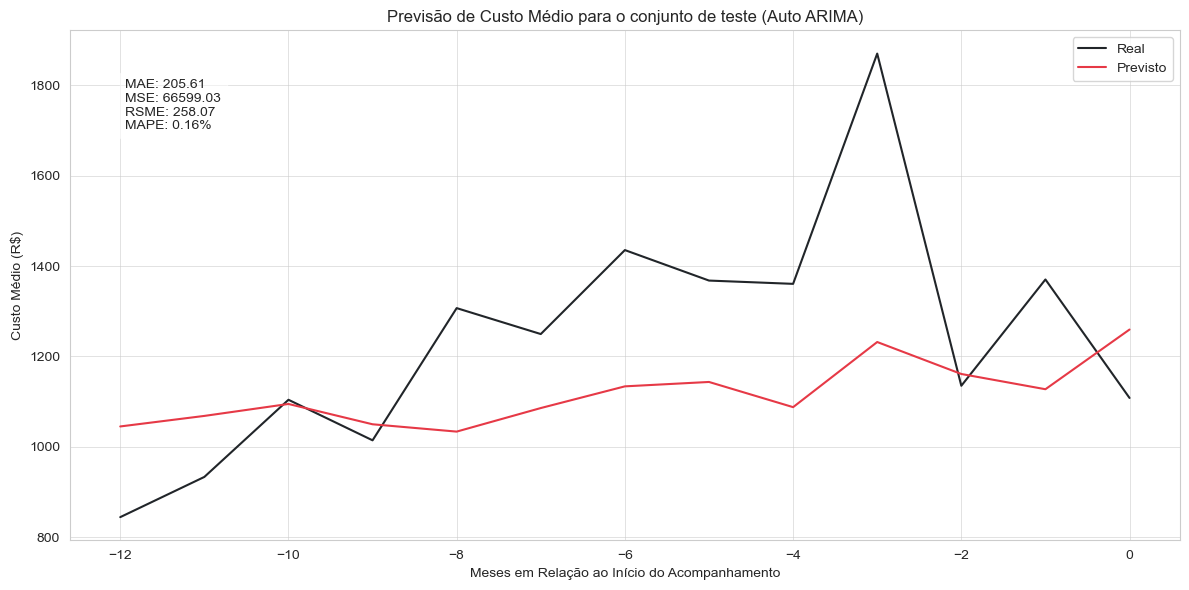

In [266]:
# Gráfico dos valores de teste reais e os previstos
plt.figure(figsize=(12,6))
plt.plot(dados_teste['QT_MES_REFERENCIA'], dados_teste['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)
plt.plot(dados_teste['QT_MES_REFERENCIA'], y_pred_auto_arima, label='Previsto', color='#e63946', linewidth = 1.5)
plt.title('Previsão de Custo Médio para o conjunto de teste (Auto ARIMA)')
plt.xlabel('Meses em Relação ao Início do Acompanhamento')
plt.ylabel('Custo Médio (R$)')
plt.legend()

# Adicionando métricas ao gráfico
plt.text(0.05, 0.80, 
         f'MAE: {mae_auto_arima}\nMSE: {mse_auto_arima}\nRSME: {rmse_auto_arima}\nMAPE: {mape_auto_arima}%', 
         transform=plt.gca().transAxes, 
         va='bottom', 
         ha='left', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.savefig('Previsão de Custo Médio para o conjunto de teste (Auto ARIMA).png', dpi=800)
plt.show()

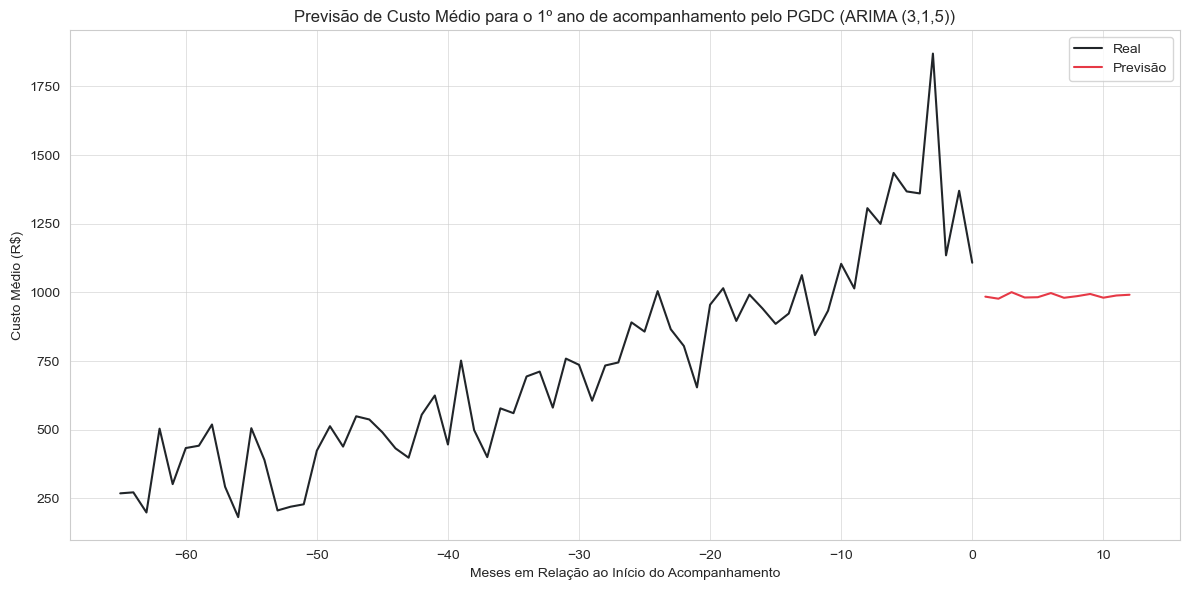

In [267]:
# Previsão dos valores de VL_CUSTO_MEDIO para 12 meses após o início do acompanhamento
previsao_arima = fit_modelo_arima.forecast(steps=25)

# Plote dos dados reais e previstos
plt.figure(figsize=(12,6))
plt.plot(df_modelos['QT_MES_REFERENCIA'], df_modelos['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)
plt.plot(range(1, 13), previsao_arima.tail(12), label='Previsão', color='#e63946', linewidth = 1.5)
plt.title('Previsão de Custo Médio para o 1º ano de acompanhamento pelo PGDC (ARIMA (3,1,5))')
plt.xlabel('Meses em Relação ao Início do Acompanhamento')
plt.ylabel('Custo Médio (R$)')
plt.legend()
plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.show()

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



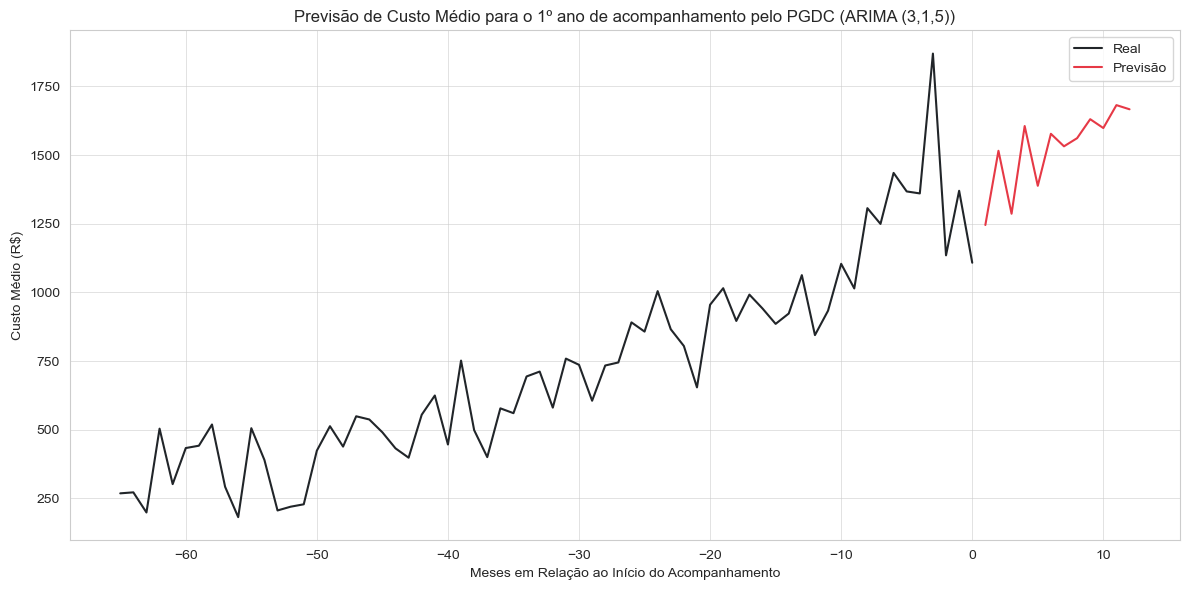

In [268]:
modelo_arima = ARIMA(df_modelos['VL_CUSTO_MEDIO'], order=(3,1,5))
fit_modelo_arima = modelo_arima.fit()

# Previsão dos valores de VL_CUSTO_MEDIO para 12 meses após o início do acompanhamento
previsao_arima = fit_modelo_arima.forecast(steps=12)

# Plote dos dados reais e previstos
plt.figure(figsize=(12,6))
plt.plot(df_modelos['QT_MES_REFERENCIA'], df_modelos['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)
plt.plot(range(1, 13), previsao_arima, label='Previsão', color='#e63946', linewidth = 1.5)
plt.title('Previsão de Custo Médio para o 1º ano de acompanhamento pelo PGDC (ARIMA (3,1,5))')
plt.xlabel('Meses em Relação ao Início do Acompanhamento')
plt.ylabel('Custo Médio (R$)')
plt.legend()
plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.show()

## **5.3 MLPRegressor**

In [269]:
# Transformação da série temporal em um problema de aprendizado supervisionado
def transforma_serie (dados, n_in=1, n_out=1, dropnan=True):
    """
    Transforma uma série temporal em um problema de aprendizado supervisionado.
    """
    n_vars = 1 if type(dados) is list or len(dados.shape) == 1 else dados.shape[1]
    df = pd.DataFrame(dados)
    cols, names = list(), list()
    
    # Cria as entradas (lags) no dataset
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # Cria a coluna de saída
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # Junta tudo
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Remove as linhas com valores NaN
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

# Transforma a série temporal em um problema de aprendizado supervisionado
n_lags = 3
dados_transformados = transforma_serie(df_modelos['VL_CUSTO_MEDIO'].values, n_in=n_lags)

dados_transformados

,var1(t-3),var1(t-2),var1(t-1),var1(t)
3,268.600000,272.205000,198.932000,504.180256
4,272.205000,198.932000,504.180256,302.168462
5,198.932000,504.180256,302.168462,433.529231
6,504.180256,302.168462,433.529231,442.021750
7,302.168462,433.529231,442.021750,519.289250
...,...,...,...,...
61,1249.635658,1435.332063,1367.899145,1360.640383
62,1435.332063,1367.899145,1360.640383,1869.818906
63,1367.899145,1360.640383,1869.818906,1135.274026
64,1360.640383,1869.818906,1135.274026,1370.336699


In [270]:
from sklearn.neural_network import MLPRegressor

# Constrói o modelo usando MLPRegressor
modelo_mlpregressor = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', 
                                   solver='adam', max_iter=20000, random_state=42)

# Arquitetura do modelo
modelo_mlpregressor

MLPRegressor(hidden_layer_sizes=(8,), max_iter=20000, random_state=42)

In [271]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Define a validação cruzada TimeSeriesSplit com 5 divisões
n_series = TimeSeriesSplit(n_splits=5)

# Separa os dados em entradas (X) e saída (y)
X = dados_transformados.values[:, :-1]
y = dados_transformados.values[:, -1]

# Realiza a validação cruzada
scores = cross_val_score(modelo_mlpregressor, X, y, cv=n_series)

In [272]:
from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros para teste
parametros = {
    'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,),
                            (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,)],
    'activation': ['logistic', 'relu', 'tanh'],
    'solver': ['adam','lbfgs', 'sgd',],
    'max_iter': [500, 5000, 20000],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(modelo_mlpregressor, parametros, cv=n_series, verbose=1, n_jobs=-1)

# Realizando a busca pelos melhores hiperparâmetros
grid_search.fit(X, y)

# Resultados
melhores_parametros = grid_search.best_params_

melhores_parametros

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



{'activation': 'relu',
 'hidden_layer_sizes': (9,),
 'learning_rate_init': 0.1,
 'max_iter': 500,
 'solver': 'adam'}

In [273]:
from sklearn.model_selection import train_test_split

# Divide os dados em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=13, shuffle=False)

# Treina o modelo com os hiperparâmetros otimizados
modelo_mlpregressor_otimizado = MLPRegressor(**melhores_parametros)
modelo_mlpregressor_otimizado.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred_mlp = modelo_mlpregressor_otimizado.predict(X_test)


c:\Users\bruno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



In [274]:
# Calculo das métricas de erro
mae_mlpregressor = mean_absolute_error(y_real, y_pred_mlp)
mse_mlpregressor = mean_squared_error(y_real, y_pred_mlp)
rmse_mlpregressor = np.sqrt(mse_mlpregressor)
mape_mlpregressor = mean_absolute_percentage_error(y_real, y_pred_mlp)

mae_mlpregressor = round(mae_mlpregressor, 2)
mse_mlpregressor = round(mse_mlpregressor, 2)
rmse_mlpregressor = round(rmse_mlpregressor, 2)
mape_mlpregressor = round(mape_mlpregressor, 2)

print("Métricas de Erro (MLPRegressor):\n")
print(f"MAE (Erro Absoluto Médio): {mae_mlpregressor}")
print(f"MSE (Erro Quadrático Médio): {mse_mlpregressor}")
print(f"RSME (Raiz do Erro Quadrático Médio): {rmse_mlpregressor}")
print(f"MAPE (Erro Absoluto Percentual Médio): {mape_mlpregressor}%")

Métricas de Erro (MLPRegressor):

MAE (Erro Absoluto Médio): 172.49
MSE (Erro Quadrático Médio): 62947.31
RSME (Raiz do Erro Quadrático Médio): 250.89
MAPE (Erro Absoluto Percentual Médio): 0.14%


In [275]:
# Calculando o RSS (soma dos resíduos quadrados) usando as previsões no conjunto de teste
rss = np.sum((y_test - y_pred_mlp)**2)

# Número de parâmetros: soma dos pesos e vieses
k = np.sum([np.prod(v.shape) for v in modelo_mlpregressor_otimizado.coefs_]) + \
    np.sum([np.prod(v.shape) for v in modelo_mlpregressor_otimizado.intercepts_])

# Calculando AIC
n = len(y_test)
aic_mlp = 2*k + n*np.log(rss/n)

# Valor AIC
print(aic_mlp)

235.65069385158708


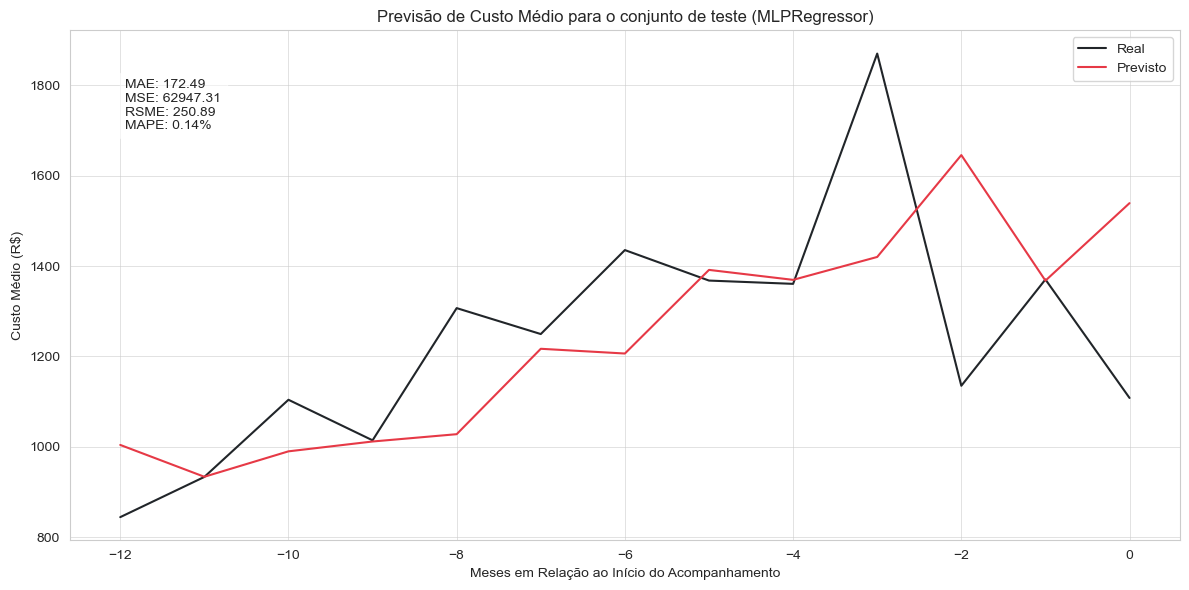

In [276]:
# Plotando os valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(dados_teste['QT_MES_REFERENCIA'], dados_teste['VL_CUSTO_MEDIO'], label='Real', color='#212529', linewidth = 1.5)
plt.plot(dados_teste['QT_MES_REFERENCIA'], y_pred_mlp, label='Previsto', color='#e63946', linewidth = 1.5)
plt.title("Previsão de Custo Médio para o conjunto de teste (MLPRegressor)")
plt.xlabel("Meses em Relação ao Início do Acompanhamento")
plt.ylabel("Custo Médio (R$)")
plt.legend()

# Adicionando métricas ao gráfico
plt.text(0.05, 0.80, 
         f'MAE: {mae_mlpregressor}\nMSE: {mse_mlpregressor}\nRSME: {rmse_mlpregressor}\nMAPE: {mape_mlpregressor}%', 
         transform=plt.gca().transAxes, 
         va='bottom', 
         ha='left', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True, linewidth = 0.4)
plt.tight_layout()

plt.savefig('Previsão de Custo Médio para o conjunto de teste (MLPRegressor).png', dpi=800)

plt.show()

# **6. Interpretação dos Resultados**

In [277]:
# Definindo o novo cabeçalho e os rótulos
modelos = ["Holt-Winters", "ARIMA(2,1,5)", "Auto ARIMA", "MLPRegressor"]
metricas = ["MAE", "MSE", "RMSE", "MAPE", "AIC"]

valores_metricas = [
    [mae_hw, mae_arima, mae_auto_arima, mae_mlpregressor],
    [mse_hw, mse_arima, mse_auto_arima, mse_mlpregressor],
    [rmse_hw, rmse_arima, rmse_auto_arima, rmse_mlpregressor],
    [mape_hw, mape_arima, mape_auto_arima, mape_mlpregressor],
    [aic_hw, aic_arima, aic_auto_arima, aic_mlp]
]

# Criando o novo DataFrame
metricas = pd.DataFrame(valores_metricas, columns=modelos, index=metricas)

metricas

,Holt-Winters,"ARIMA(2,1,5)",Auto ARIMA,MLPRegressor
MAE,168.090000,285.050000,205.610000,172.490000
MSE,47301.030000,127088.610000,66599.030000,62947.310000
RMSE,217.490000,356.490000,258.070000,250.890000
MAPE,0.140000,0.210000,0.160000,0.140000
AIC,507.325168,659.993434,519.087737,235.650694


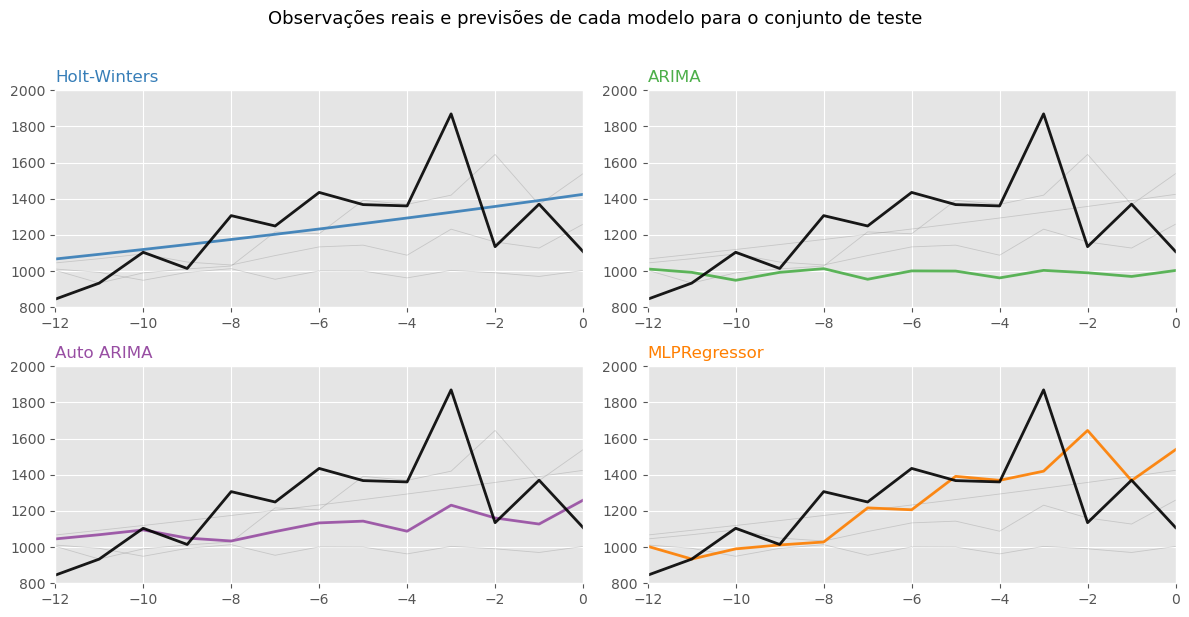

In [285]:
# Dados
df=pd.DataFrame({'x': dados_teste['QT_MES_REFERENCIA'], 
                 'Holt-Winters': y_pred_hw, 
                 'ARIMA': y_pred_arima, 
                 'Auto ARIMA': y_pred_auto_arima, 
                 'MLPRegressor': y_pred_mlp })
 
plt.style.use('ggplot')
 
palette = plt.get_cmap('Set1')
 
plt.figure(figsize=(12, 6))

# Plote das diversas linhas
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    plt.subplot(2,2, num)
 
    for v in df.drop('x', axis=1):
        plt.plot(df['x'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)

    plt.plot(dados_teste['QT_MES_REFERENCIA'], dados_teste['VL_CUSTO_MEDIO'], color='black',  linewidth=2, alpha=0.9, marker='')
 
    plt.xlim(-12,0)
    plt.ylim(800,2000)
 
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

plt.suptitle("Observações reais e previsões de cada modelo para o conjunto de teste", fontsize=13, fontweight=0, color='black', y=1.02)
 
plt.tight_layout()

plt.savefig('Observações reais e previsões de cada modelo para o conjunto de teste.png', dpi=800)

plt.show()

In [279]:
# Previsão recursiva para os 12 meses após o início do programa (1-12)
previsoes_futuras = []
entrada_atual = X[-1].tolist()  # Pega os últimos 3 pontos da série

for i in range(13):  # Prever 12 pontos à frente
    previsao = modelo_mlpregressor_otimizado.predict([entrada_atual])
    previsoes_futuras.append(previsao[0])
    entrada_atual.append(previsao[0])
    entrada_atual.pop(0)  # Remove o ponto mais antigo
    print(entrada_atual)

previsoes_futuras.pop(0)
previsoes_futuras


[1135.274025590551, 1370.336699410609, 1539.1282506726877]
[1370.336699410609, 1539.1282506726877, 1402.2452780424019]
[1539.1282506726877, 1402.2452780424019, 1446.5432823592407]
[1402.2452780424019, 1446.5432823592407, 1504.841864361357]
[1446.5432823592407, 1504.841864361357, 1492.6146852779489]
[1504.841864361357, 1492.6146852779489, 1512.1099368329415]
[1492.6146852779489, 1512.1099368329415, 1540.2311434860844]
[1512.1099368329415, 1540.2311434860844, 1553.029896082394]
[1540.2311434860844, 1553.029896082394, 1570.963972415176]
[1553.029896082394, 1570.963972415176, 1591.8819253748757]
[1570.963972415176, 1591.8819253748757, 1609.719677671724]
[1591.8819253748757, 1609.719677671724, 1628.362150491365]
[1609.719677671724, 1628.362150491365, 1647.9342527253932]


[1402.2452780424019,
 1446.5432823592407,
 1504.841864361357,
 1492.6146852779489,
 1512.1099368329415,
 1540.2311434860844,
 1553.029896082394,
 1570.963972415176,
 1591.8819253748757,
 1609.719677671724,
 1628.362150491365,
 1647.9342527253932]

In [280]:
y_pred_mlp

array([1004.45336267,  934.04586736,  990.27367065, 1012.03378883,
       1028.19760568, 1217.07029095, 1206.58139291, 1391.50254751,
       1369.46144036, 1420.12301245, 1645.39687343, 1367.74530136,
       1539.12825067])

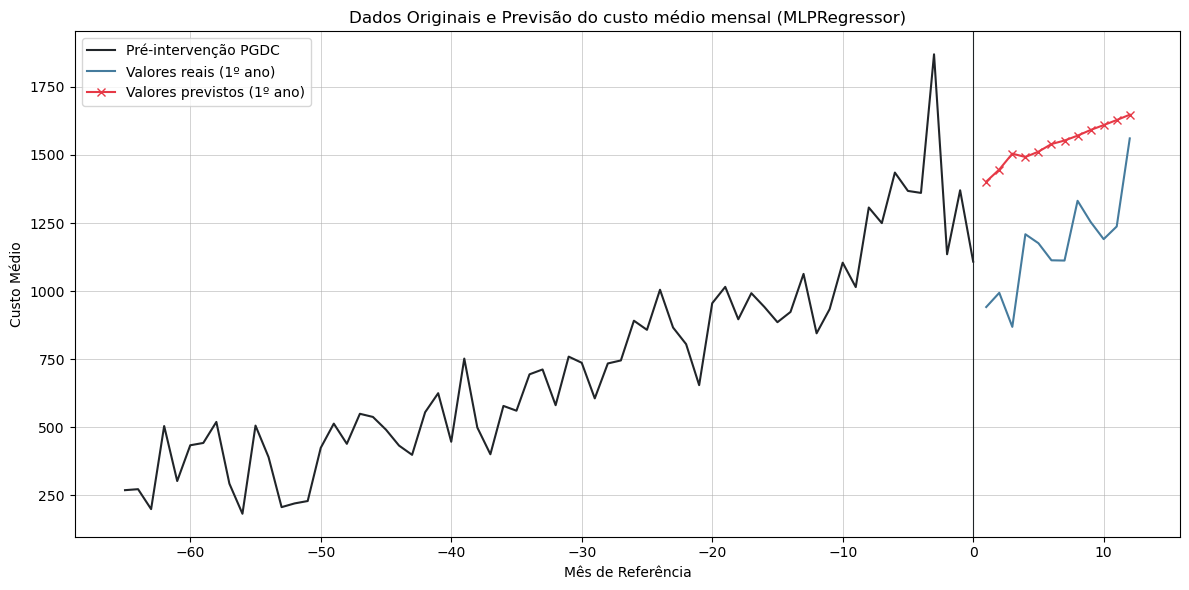

In [289]:
# Plotando os dados originais e as previsões futuras
plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.plot(df_modelos['QT_MES_REFERENCIA'], df_modelos['VL_CUSTO_MEDIO'], label="Pré-intervenção PGDC", color='#212529', linewidth = 1.5)
plt.plot(df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] > 0]['QT_MES_REFERENCIA'], df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] > 0]['VL_CUSTO_MEDIO'], label="Valores reais (1º ano)", color='#457b9d', linewidth = 1.5)
plt.plot(range(df_modelos['QT_MES_REFERENCIA'].iloc[-1] + 1, df_modelos['QT_MES_REFERENCIA'].iloc[-1] + 13), previsoes_futuras, label="Valores previstos (1º ano)", marker='x', color='#e63946', linewidth = 1.5)
plt.axvline(x=0, color='#212529', linestyle='-', linewidth = 0.8)
plt.title("Dados Originais e Previsão do custo médio mensal (MLPRegressor)")
plt.xlabel("Mês de Referência")
plt.ylabel("Custo Médio")
plt.legend()
plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.savefig('Dados Originais e Previsão do custo médio mensal (MLPRegressor).png', dpi=800)
plt.show()

In [282]:
# Criando as séries
tipo_previsoes = ['Valores Previstos'] * len(previsoes_futuras)
vl_custo_medio_previsoes = previsoes_futuras

tipo_real = ['Valores reais'] * len(df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] > 0])
vl_custo_medio_real = df_custo_medio[df_custo_medio['QT_MES_REFERENCIA'] > 0]['VL_CUSTO_MEDIO']

# Concatenando as séries para criar o dataframe final
df_final = pd.DataFrame({
    'TIPO': tipo_previsoes + tipo_real,
    'VL_CUSTO_MEDIO': list(vl_custo_medio_previsoes) + list(vl_custo_medio_real)
})

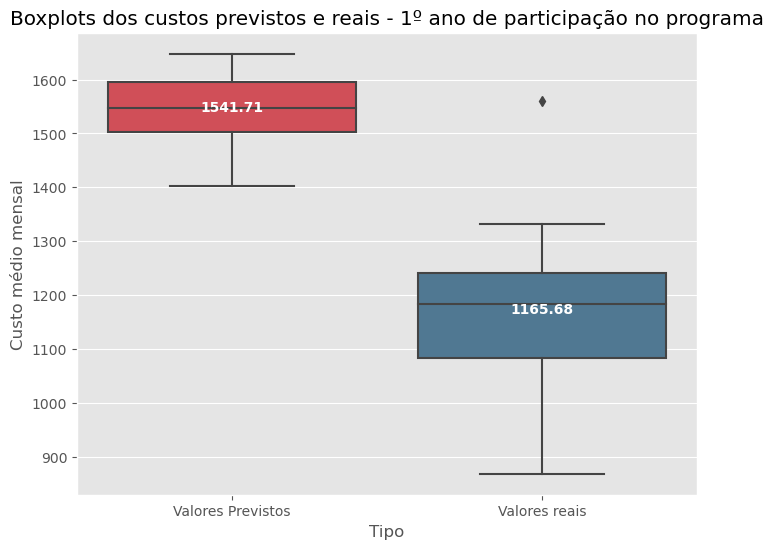

In [286]:
palette = {
    'Valores Previstos': '#e63946',
    'Valores reais': '#457b9d'
}
# Criando boxplots
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df_final, x='TIPO', y='VL_CUSTO_MEDIO', palette=palette)
plt.title('Boxplots dos custos previstos e reais - 1º ano de participação no programa')
plt.xlabel('Tipo')
plt.ylabel('Custo médio mensal')

# Adicionando a média de cada grupo
for i, tipo in enumerate(df_final['TIPO'].unique()):
    media = df_final[df_final['TIPO'] == tipo]['VL_CUSTO_MEDIO'].mean()
    ax.text(i, media, f'{media:.2f}', horizontalalignment='center', color='white', weight='bold')

plt.savefig('Boxplots dos custos previstos e reais - 1º ano de participação no programa.png', dpi=800)
plt.show()

In [297]:
# Descrevendo estatísticas para cada tipo
descricao_real = df_final[df_final["TIPO"] == "Valores reais"]["VL_CUSTO_MEDIO"].describe()
descricao_previsto = df_final[df_final["TIPO"] == "Valores Previstos"]["VL_CUSTO_MEDIO"].describe()

descricao_real, descricao_previsto

(count      12.000000
 mean     1165.676882
 std       184.180868
 min       868.543200
 25%      1082.510314
 50%      1183.312613
 75%      1241.534228
 max      1560.911652
 Name: VL_CUSTO_MEDIO, dtype: float64,
 count      12.000000
 mean     1541.706505
 std        73.900260
 min      1402.245278
 25%      1501.785070
 50%      1546.630520
 75%      1596.341363
 max      1647.934253
 Name: VL_CUSTO_MEDIO, dtype: float64)

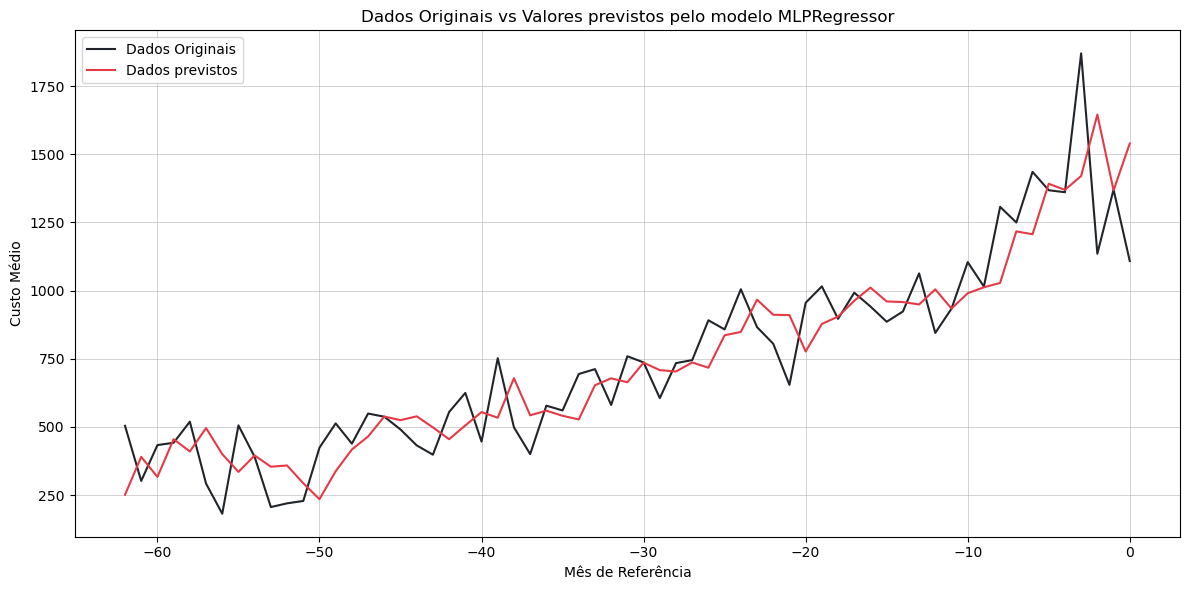

In [309]:
y_pred = modelo_mlpregressor_otimizado.predict(X)

# Plotando os dados originais e as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(df_modelos['QT_MES_REFERENCIA'].tail(63), df_modelos['VL_CUSTO_MEDIO'].tail(63), label="Dados Originais", color='#212529', linewidth = 1.5)
plt.plot(df_modelos['QT_MES_REFERENCIA'].tail(63), y_pred, label="Dados previstos", color='#e63946', linewidth = 1.5)
plt.title("Dados Originais vs Valores previstos pelo modelo MLPRegressor")
plt.xlabel("Mês de Referência")
plt.ylabel("Custo Médio")
plt.legend()
plt.grid(True, linewidth = 0.4)
plt.tight_layout()
plt.show()

In [312]:
from scipy.stats import shapiro, levene, ttest_ind

# Teste de Normalidade para ambos os conjuntos (Shapiro-Wilk)
p_valor_real = shapiro(df_final[df_final["TIPO"] == "Valores reais"]["VL_CUSTO_MEDIO"])
p_valor_previsto = shapiro(df_final[df_final["TIPO"] == "Valores Previstos"]["VL_CUSTO_MEDIO"])

# Teste de Homocedasticidade (Levene)
p_valor_levene = levene(df_final[df_final["TIPO"] == "Valores reais"]["VL_CUSTO_MEDIO"], 
                          df_final[df_final["TIPO"] == "Valores Previstos"]["VL_CUSTO_MEDIO"])

p_valor_real, p_valor_previsto, p_valor_levene

(ShapiroResult(statistic=0.9619141221046448, pvalue=0.8107696771621704),
 ShapiroResult(statistic=0.9755776524543762, pvalue=0.9596397876739502),
 LeveneResult(statistic=3.7340573701017963, pvalue=0.06629110953613954))

In [311]:
# Teste t de Student para amostras independentes
t_stat, p_valor_ttest = ttest_ind(df_final[df_final["TIPO"] == "Valores reais"]["VL_CUSTO_MEDIO"], 
                                  df_final[df_final["TIPO"] == "Valores Previstos"]["VL_CUSTO_MEDIO"])

t_stat, p_valor_ttest

(-6.563774450940586, 1.3336525303813554e-06)